Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns

-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

# Exploratory Data Analysis

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')

In [3]:
df=pd.DataFrame(data=data)

In [4]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,C-,C-,B+,D,A-,B-,C+,D+,D+,D,A,D,C-,C,C-,C+,B,C,C+,B+,C,C-,C,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,D,B+,C+,B-,C-,D+,D+,D,C,D,B-,C,D,D+,D,C-,A-,D+,C-,C-,C,A-,D,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,A-,B-,A-,A,A,A,A,A+,A,A-,A,A-,A,A,C+,A,B+,A-,B,A,B+,A-,A-,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,C+,D,B,D+,B-,D,C,B+,C+,D,D+,D,D,D+,D,B-,D,B-,D+,C-,D+,B+,C-,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,A-,C,A,A,A-,A-,A-,B-,A,A-,A,A-,A-,C+,C-,A-,B-,A-,C+,A-,A-,B-,A-,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,B+,A+,A,A+,A,A,A,A,A+,A,A,B,A-,A,B,A-,A-,A,A+,A+,A,A,B+,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,A,A+,B+,C+,A-,B,A,A,A+,A+,A,A,B,A,A,A,A,A,A,A+,A,A+,A-,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,B,A+,B-,B,B+,B,A-,A,B+,B,A,B+,B,A,B,B-,B+,B+,A,B+,B,C+,B+,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,C-,A+,C+,D,D,B,B-,B,B-,C,B-,D+,D+,C+,D,C,C,C+,C-,C-,D,B-,B+,D,B,B,C-,D,C,B,B-,C,2.193


In [5]:
df.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,C-,C-,B+,D,A-,B-,C+,D+,D+,D,A,D,C-,C,C-,C+,B,C,C+,B+,C,C-,C,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,D,B+,C+,B-,C-,D+,D+,D,C,D,B-,C,D,D+,D,C-,A-,D+,C-,C-,C,A-,D,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,A-,B-,A-,A,A,A,A,A+,A,A-,A,A-,A,A,C+,A,B+,A-,B,A,B+,A-,A-,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,C+,D,B,D+,B-,D,C,B+,C+,D,D+,D,D,D+,D,B-,D,B-,D+,C-,D+,B+,C-,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,A-,C,A,A,A-,A-,A-,B-,A,A-,A,A-,A-,C+,C-,A-,B-,A-,C+,A-,A-,B-,A-,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,B+,C-,A-,B-,B+,A-,B+,B,A-,B,A-,A-,C+,B+,C-,A-,B-,C+,B,A-,A-,B-,B+,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,B+,A-,A,C,C+,C-,B-,B-,B+,C,A,C+,C-,C+,C+,B+,B+,B,C-,B+,A-,C,C+,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,A-,B+,A,B+,B+,C,A-,B+,A-,C,A-,C+,C,C,C+,A-,D+,A-,C,A-,B,B,B+,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,A-,A-,A,A,A-,B-,A-,A-,A,B-,A+,C+,C+,A-,C-,B+,B,B,B+,A,A-,B+,A-,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,A,C+,A-,B-,A,A-,A,B-,A,B-,A-,B-,A-,B,B+,A-,B-,B-,C+,B,B+,B-,A-,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [6]:
df.tail(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
561,CS-97562,B-,B,A-,B+,B-,B+,A-,A,B,B,C,B+,B-,B+,B-,A-,C+,B,A,A,B,B-,A,B+,C+,B-,C,C,B+,C,D,D,B+,B-,B+,D+,C+,B-,B+,C,C+,2.828
562,CS-97563,B,B,A,C,B,B+,B,C-,B+,B+,B-,C+,C-,C+,B,C+,C+,B-,C,C,C+,B,A,B-,C+,B-,B,B,A-,C+,C,B-,A-,B,B+,B+,B+,C+,A-,D+,C+,2.821
563,CS-97564,A-,B,A,D+,B+,A-,C,A,C+,C,B,B,B+,B,C,B,B,A,C-,C,C,C+,A,B,C+,C,B+,B,B+,C-,B-,C-,B+,C,B+,C-,C-,C,F,D,C,2.612
564,CS-97565,A-,D,A,C,B+,B+,C,A-,B-,D,B+,B,C-,B,C,B+,B-,C+,B+,A-,C,B+,C+,B-,C+,B,B-,C+,C+,C,D,C-,B,C+,B+,D+,C,C-,B,C,B-,2.607
565,CS-97566,F,F,D,C-,NaN,D+,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,B+,A+,A,A+,A,A,A,A,A+,A,A,B,A-,A,B,A-,A-,A,A+,A+,A,A,B+,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,A,A+,B+,C+,A-,B,A,A,A+,A+,A,A,B,A,A,A,A,A,A,A+,A,A+,A-,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,B,A+,B-,B,B+,B,A-,A,B+,B,A,B+,B,A,B,B-,B+,B+,A,B+,B,C+,B+,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,C-,A+,C+,D,D,B,B-,B,B-,C,B-,D+,D+,C+,D,C,C,C+,C-,C-,D,B-,B+,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,D+,B-,C+,C-,B+,D+,B+,C-,B,D+,C-,C,D+,C,D,F,D,D,C,A-,F,C-,D+,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [7]:
# Checking the shape of the data

df.shape

(571, 43)

In [8]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')>

In [9]:
# Checking the data types of each feature

df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

After briefly analyzing the dataset the following are the observations

1. In this dataset the CGPA needs to be predicted based on the grades. 
2. All the grades are in categorical format which are object data types.
3. The CGPA is our dependent variable which is continuous data type.
4. The dataset has 571 rows and 43 columns/features.
5. All the features accept CGPA are objects datatype and CGPA is of float datatype.
6. Null values can be observed in many features. Further analysis required. 
7. Although all the independent features are category variables but since the dependent variable is continuous type, hence we need to implement linear regression models.

In [11]:
# Extracting the list of features containing null values 

feature_with_null=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
print('The features with null values are: ',feature_with_null)
print('\n')
print('The count of features with null values: ',len(feature_with_null))

The features with null values are:  ['CY-105', 'HS-105/12', 'MT-111', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']


The count of features with null values:  38


In [12]:
# Extracting the percentage of null values in each column
def null_value_calculator(df):
    null_total=[]
    percentage=[]
    feature_with_null=[]
    for feature in df.columns:
        if df[feature].isnull().sum()>=1:
            feature_with_null.append(feature)
            total_count=df[feature].isnull().sum()
            percentage_count=total_count*100/len(df[feature])
        
            null_total.append(total_count)
            percentage.append(percentage_count)
    
    df_percentage=pd.DataFrame({'Feature name':feature_with_null,
                                'Total null value':null_total,
                                'Null percentage': percentage},index=range(1,len(feature_with_null)+1))
    return df_percentage

In [13]:
null_value_calculator(df)

,Feature name,Total null value,Null percentage
1,CY-105,1,0.175131
2,HS-105/12,1,0.175131
3,MT-111,2,0.350263
4,CS-106,2,0.350263
5,EL-102,2,0.350263
6,EE-119,2,0.350263
7,ME-107,2,0.350263
8,CS-107,2,0.350263
9,HS-205/20,5,0.875657
10,MT-222,5,0.875657


In [14]:
# Total null value in the dataset

total_null_value=df.isnull().sum().sum()
total_null_value

425

Null values are present in 38 features. The percentage of null values in almost all features are moderately less except two features. The feature 'CS-406' has 15% null values present and 'CS-412' has 14% null value present.

In [15]:
# Separating all the grading features from the dataset

grade_categories=[feature for feature in df.columns if df[feature].dtypes=='O' and feature not in 'Seat No.']

In [16]:
# Analyzing unique values in each subject

pd.set_option('display.max_colwidth',None)
unique_values_list = []
total_count=[]

for feature in grade_categories:
    unique_values = df[feature].unique()
    unique_values_list.append(unique_values)
    total_count.append(len(unique_values))

columns=[feature for feature in df.columns if df[feature].name not in ['Seat No.', 'CGPA']]
df_unique=pd.DataFrame({'Feature names': columns,
                        'Unique values':unique_values_list,
                        'Total count':total_count
                       },index=range(1,len(columns)+1))
df_unique

,Feature names,Unique values,Total count
1,PH-121,"[B-, A, D, A-, B+, B, C+, C, C-, D+, WU, A+, F]",13
2,HS-101,"[D+, D, B, C+, A-, B-, C-, B+, C, A, A+, F]",12
3,CY-105,"[C-, D+, A, A-, B, C+, B+, B-, C, D, nan, WU, A+, F]",14
4,HS-105/12,"[C, D, B-, B+, D+, B, C-, C+, A-, A, nan, WU, A+, F]",14
5,MT-111,"[C-, B-, B+, D, A, C+, A-, C, B, D+, nan, A+, F, WU]",14
6,CS-105,"[D+, C, A, A-, B, B-, B+, C+, C-, A+, D]",11
7,CS-106,"[D, B-, D+, A-, C+, A, C-, C, B, B+, nan, A+, F, WU]",14
8,EL-102,"[C-, A, B+, B, A-, B-, C, C+, D+, D, nan, A+, WU, F]",14
9,EE-119,"[B-, D+, A-, D, A, B+, B, C-, C+, C, WU, nan, A+]",13
10,ME-107,"[C-, D, A-, C+, B+, A, D+, C, B, B-, WU, nan, F, A+]",14


In [17]:
# Checking the overall unique grading values in the dataset

data=df[grade_categories].astype(str).values.flatten()
unique_values = np.unique(data)
print(unique_values)

['A' 'A+' 'A-' 'B' 'B+' 'B-' 'C' 'C+' 'C-' 'D' 'D+' 'F' 'I' 'W' 'WU' 'nan']


In [18]:
# Checking total count of grading categories in the dataset

print('Total no. of categories of grades is',len(unique_values))

Total no. of categories of grades is 16


There are a total of 16 grade categories/classifications available in the dataset. Each column has different counts of grades category.  

Removing Null values from the dataset

All the categorical variables represents grades of each candidate. Checking the candidates where null is greater than 5 row-wise   

In [19]:
# Checking the dataset row-wise to extract the rows where NaN value is greater than 5

rows_with_nan=df[df.isnull().sum(axis=1)>5]
rows_with_nan

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
44,CS-97045,D,C,NaN,NaN,NaN,C-,NaN,NaN,D+,WU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493
60,CS-97061,C,B+,WU,D+,C-,B-,F,D,A-,B,I,WU,WU,NaN,NaN,NaN,WU,I,I,WU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.418
86,CS-97087,D,D,D+,B-,F,D,D,D,D+,D+,C-,B,F,D+,D,D,F,D,D,F,D,D+,F,D+,D+,F,D,F,C,D,D,D,D+,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.261
91,CS-97092,WU,C-,D,D,WU,D,D,D,C,D+,D+,B,F,W,WU,WU,F,F,F,D,WU,WU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380
137,CS-97138,C-,C+,WU,WU,WU,B,WU,WU,A-,C+,WU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.653
142,CS-97143,C+,B-,B,A-,A,A-,C,WU,A-,NaN,D+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.943
143,CS-97144,D,D,WU,WU,WU,D,WU,WU,D,WU,WU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000
281,CS-97282,WU,D+,F,F,F,D,NaN,D,WU,F,D,F,F,W,W,W,F,F,F,F,WU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.092
282,CS-97283,B-,C+,D+,D,A-,B-,B,B+,NaN,D,C-,A-,C+,B-,B,D,C,D+,B-,D,C-,C-,F,NaN,NaN,NaN,NaN,NaN,NaN,D,D+,C+,F,NaN,D,NaN,NaN,NaN,NaN,NaN,NaN,2.086
288,CS-97289,D,C-,D,C,D,D,B-,F,D+,F,F,F,W,NaN,NaN,NaN,W,D+,NaN,NaN,D,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.998


In [20]:
# Checking the total count of null values in rows_with_nan variable

rows_with_nan.isnull().sum().sum()

279

In [21]:
# Checking the length of rows_with_nan where null values in rows greater than 5 

len(rows_with_nan)

12

1. We can observe that there are a total of 12 rows where NaN value is greater than 5.
2. The total NaN values in all the 12 rows is 279. The total NaN values in the overall dataset is 425.

Since the presence of NaN values in all the 12 rows is very high. Hence we can delete these rows.

In [22]:
# Dropping the rows from the dataset
row_list_to_drop=list(rows_with_nan.index)

df.drop(index=row_list_to_drop,inplace=True)

In [23]:
df.shape

(559, 43)

After removing the 12 rows the shape has reduced to 559 from 571 rows.

In [24]:
# Checking the percentage of Null values 

df_null=null_value_calculator(df)
df_null

,Feature name,Total null value,Null percentage
1,CS-317,1,0.178891
2,CS-403,1,0.178891
3,CS-406,73,13.059034
4,CS-414,1,0.178891
5,CS-419,1,0.178891
6,CS-423,2,0.357782
7,CS-412,67,11.985689


The features CS-406 and CS-412 has high percentage of nan values. Hence we can drop the 2 features.

In [25]:
# Removing null from features with less than 2 Nan values using mode function

for feature in df.columns:
    if df[feature].isnull().sum()>=1 and df[feature].isnull().sum()<=2:
        df[feature]=df[feature].fillna(df[feature].mode()[0])

In [26]:
# Calling Null value

null_value_calculator(df)

,Feature name,Total null value,Null percentage
1,CS-406,73,13.059034
2,CS-412,67,11.985689


In [27]:
# Dropping the features CS-406 and CS-412

df.drop('CS-406',axis=1,inplace=True)
df.drop('CS-412',axis=1,inplace=True)

In [28]:
# Checking if null value still exists

df.isnull().sum().sum()

0

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, 0 to 570
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   559 non-null    object 
 1   PH-121     559 non-null    object 
 2   HS-101     559 non-null    object 
 3   CY-105     559 non-null    object 
 4   HS-105/12  559 non-null    object 
 5   MT-111     559 non-null    object 
 6   CS-105     559 non-null    object 
 7   CS-106     559 non-null    object 
 8   EL-102     559 non-null    object 
 9   EE-119     559 non-null    object 
 10  ME-107     559 non-null    object 
 11  CS-107     559 non-null    object 
 12  HS-205/20  559 non-null    object 
 13  MT-222     559 non-null    object 
 14  EE-222     559 non-null    object 
 15  MT-224     559 non-null    object 
 16  CS-210     559 non-null    object 
 17  CS-211     559 non-null    object 
 18  CS-203     559 non-null    object 
 19  CS-214     559 non-null    object 
 20  EE-217     559 

In [30]:
df.shape

(559, 41)

1. All the Null values has been removed from the dataset.
2. There are 12 rows removed from the dataset where null value is very high.
3. Two features are dropped from the dataset where the percentage of null value is more than 10%.
4. The features with few null values are replced using mode function.
5. The shape of the data is 559 rows and 41 columns.

The dataset is now free of null values

# Data Visualization

Univariate analysis

To continue with data visualization lets separate the categorical features and target variable

In [31]:
# Creating a list with categorical features

cat_feature=[feature for feature in df.columns if df[feature].dtypes=='O' and feature not in 'Seat No.']

In [32]:
# Dividing the features in 4 equal parts

cat_feature_1=cat_feature[:10]
cat_feature_2=cat_feature[10:20]
cat_feature_3=cat_feature[20:30]
cat_feature_4=cat_feature[30:]

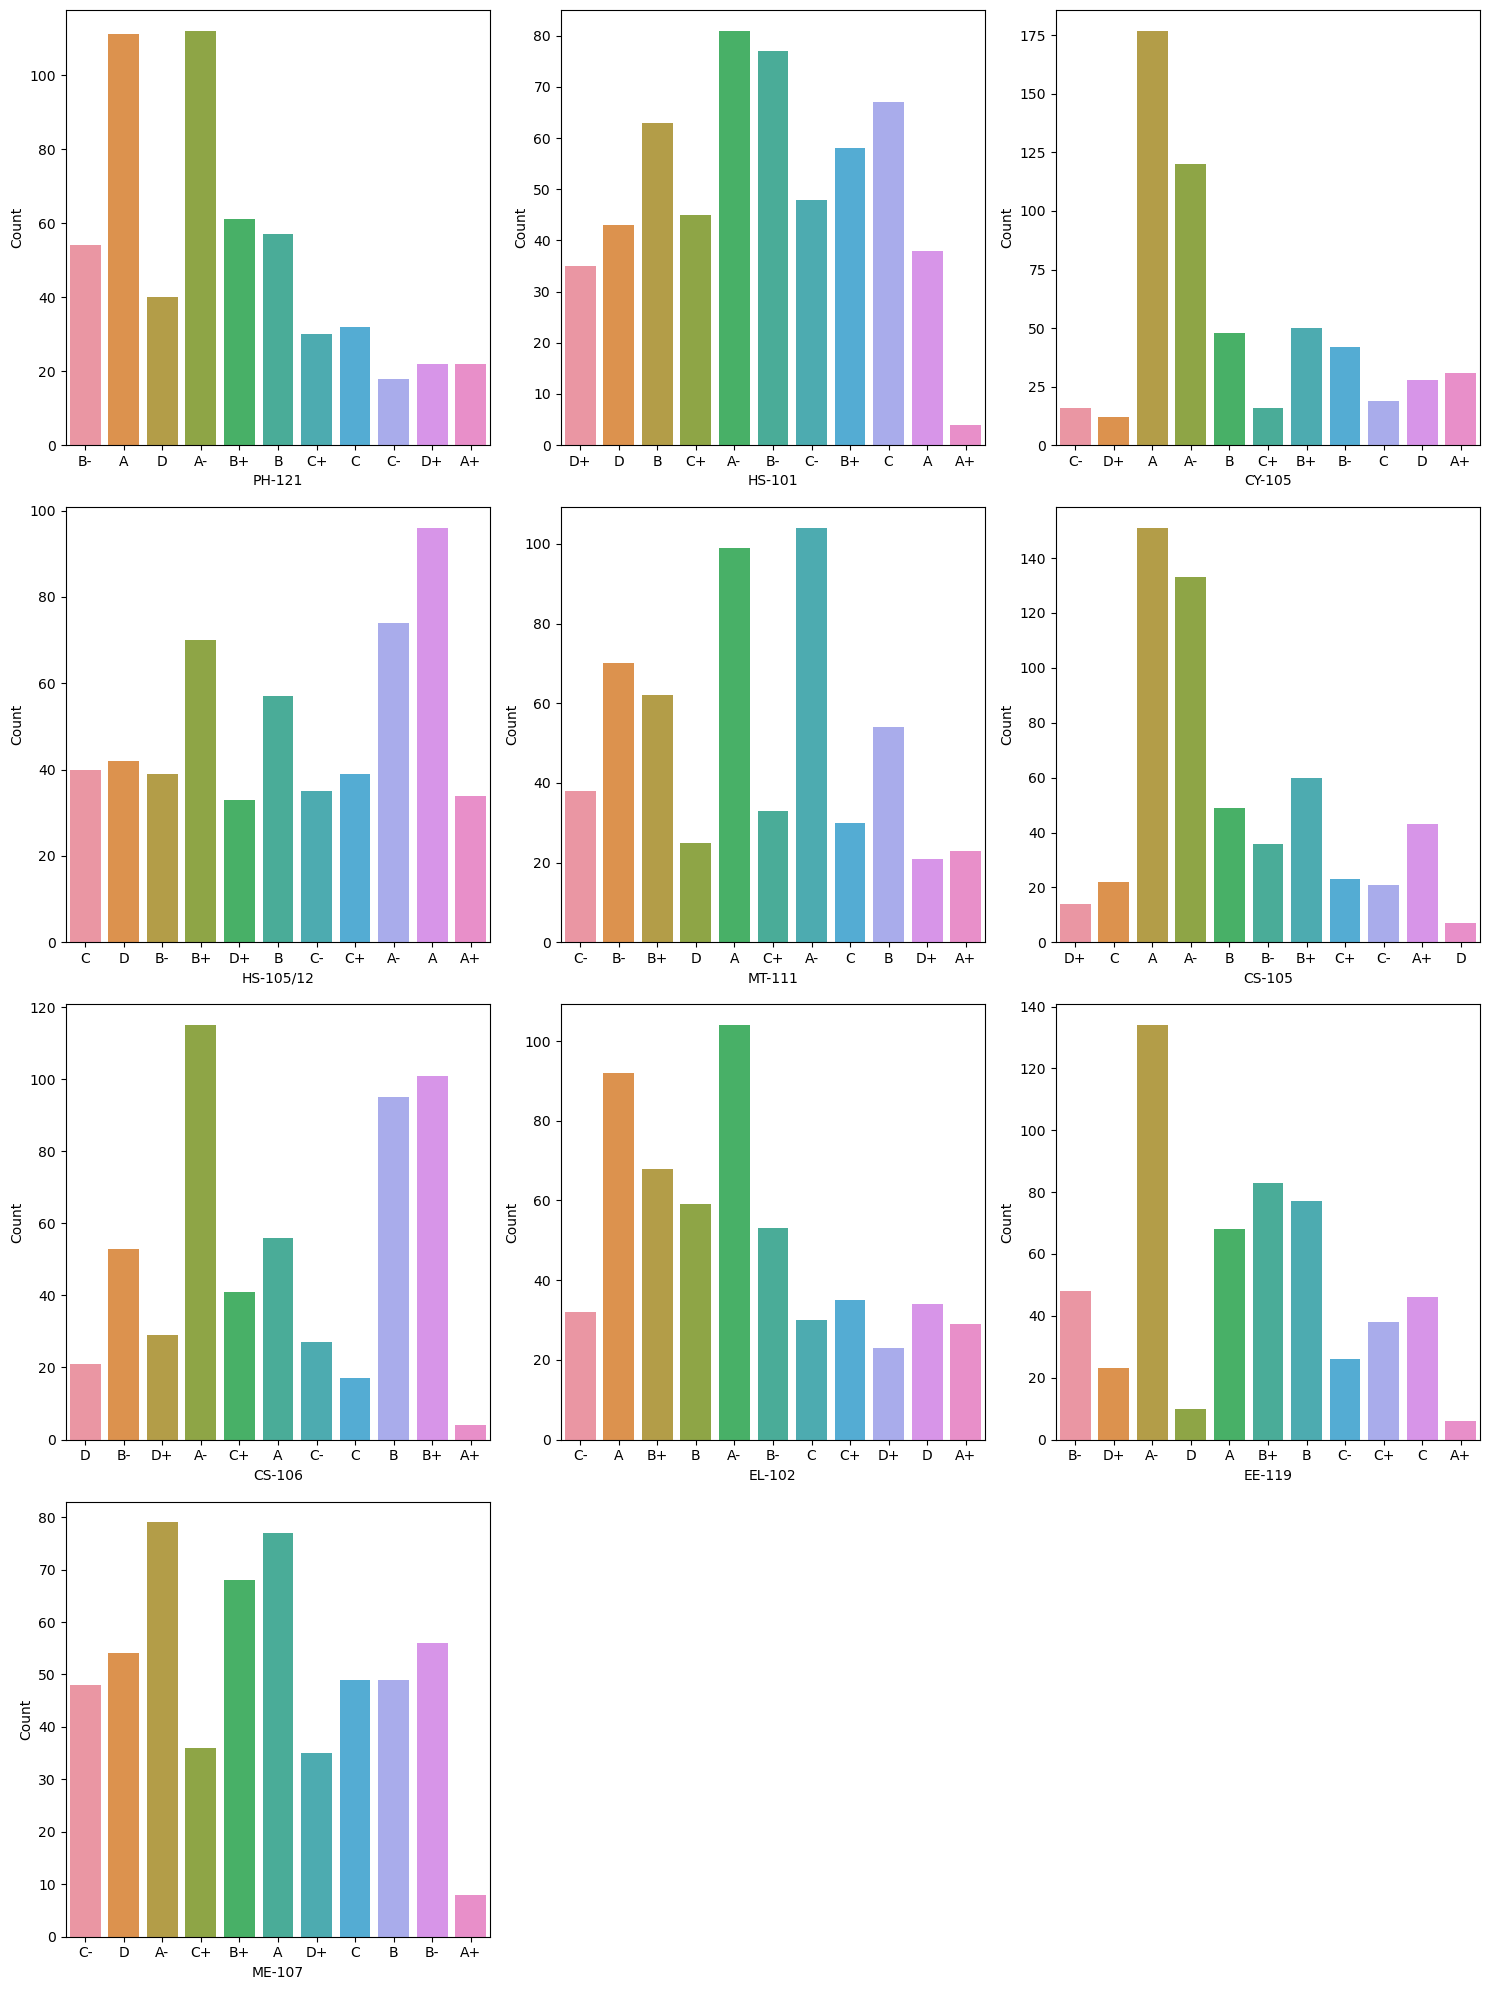

In [33]:
# Visualizing using count plot
plt.figure(figsize=(15,20))
index=1
for feature in cat_feature_1:
    if index<=len(cat_feature_1):
        plt.subplot(4,3,index)
        sns.countplot(x=feature,data=df)
        plt.xlabel(feature)
        plt.ylabel('Count')
        index=index+1
plt.tight_layout()

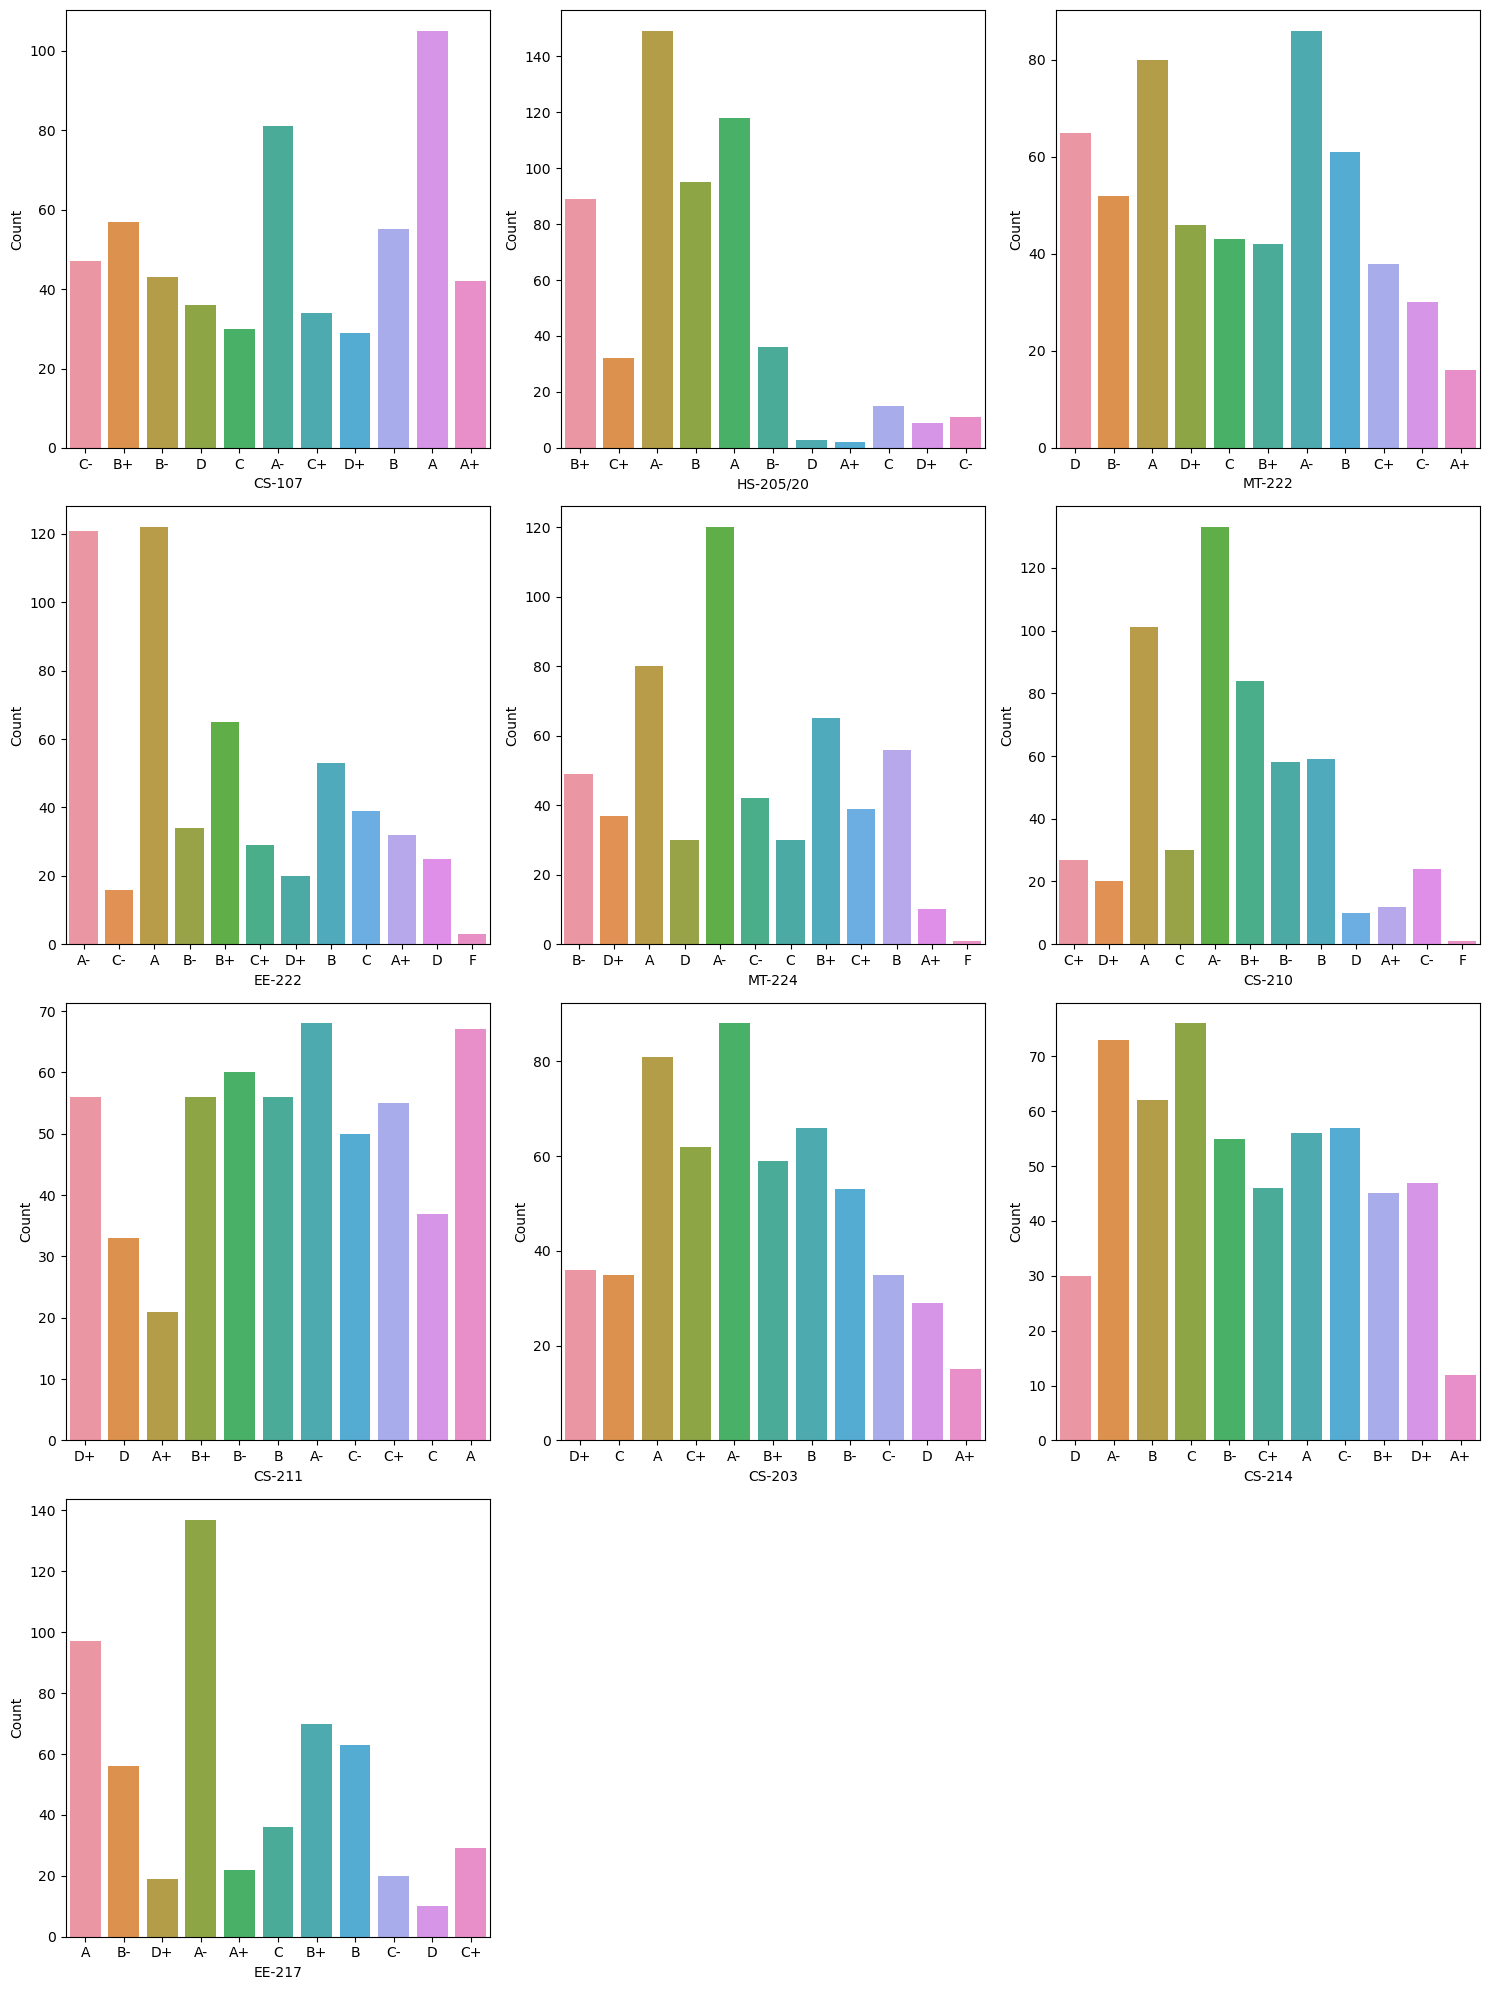

In [34]:
# Visualizing using count plot
plt.figure(figsize=(15,20))
index=1
for feature in cat_feature_2:
    if index<=len(cat_feature_2):
        plt.subplot(4,3,index)
        sns.countplot(x=feature,data=df)
        plt.xlabel(feature)
        plt.ylabel('Count')
        index=index+1
plt.tight_layout()

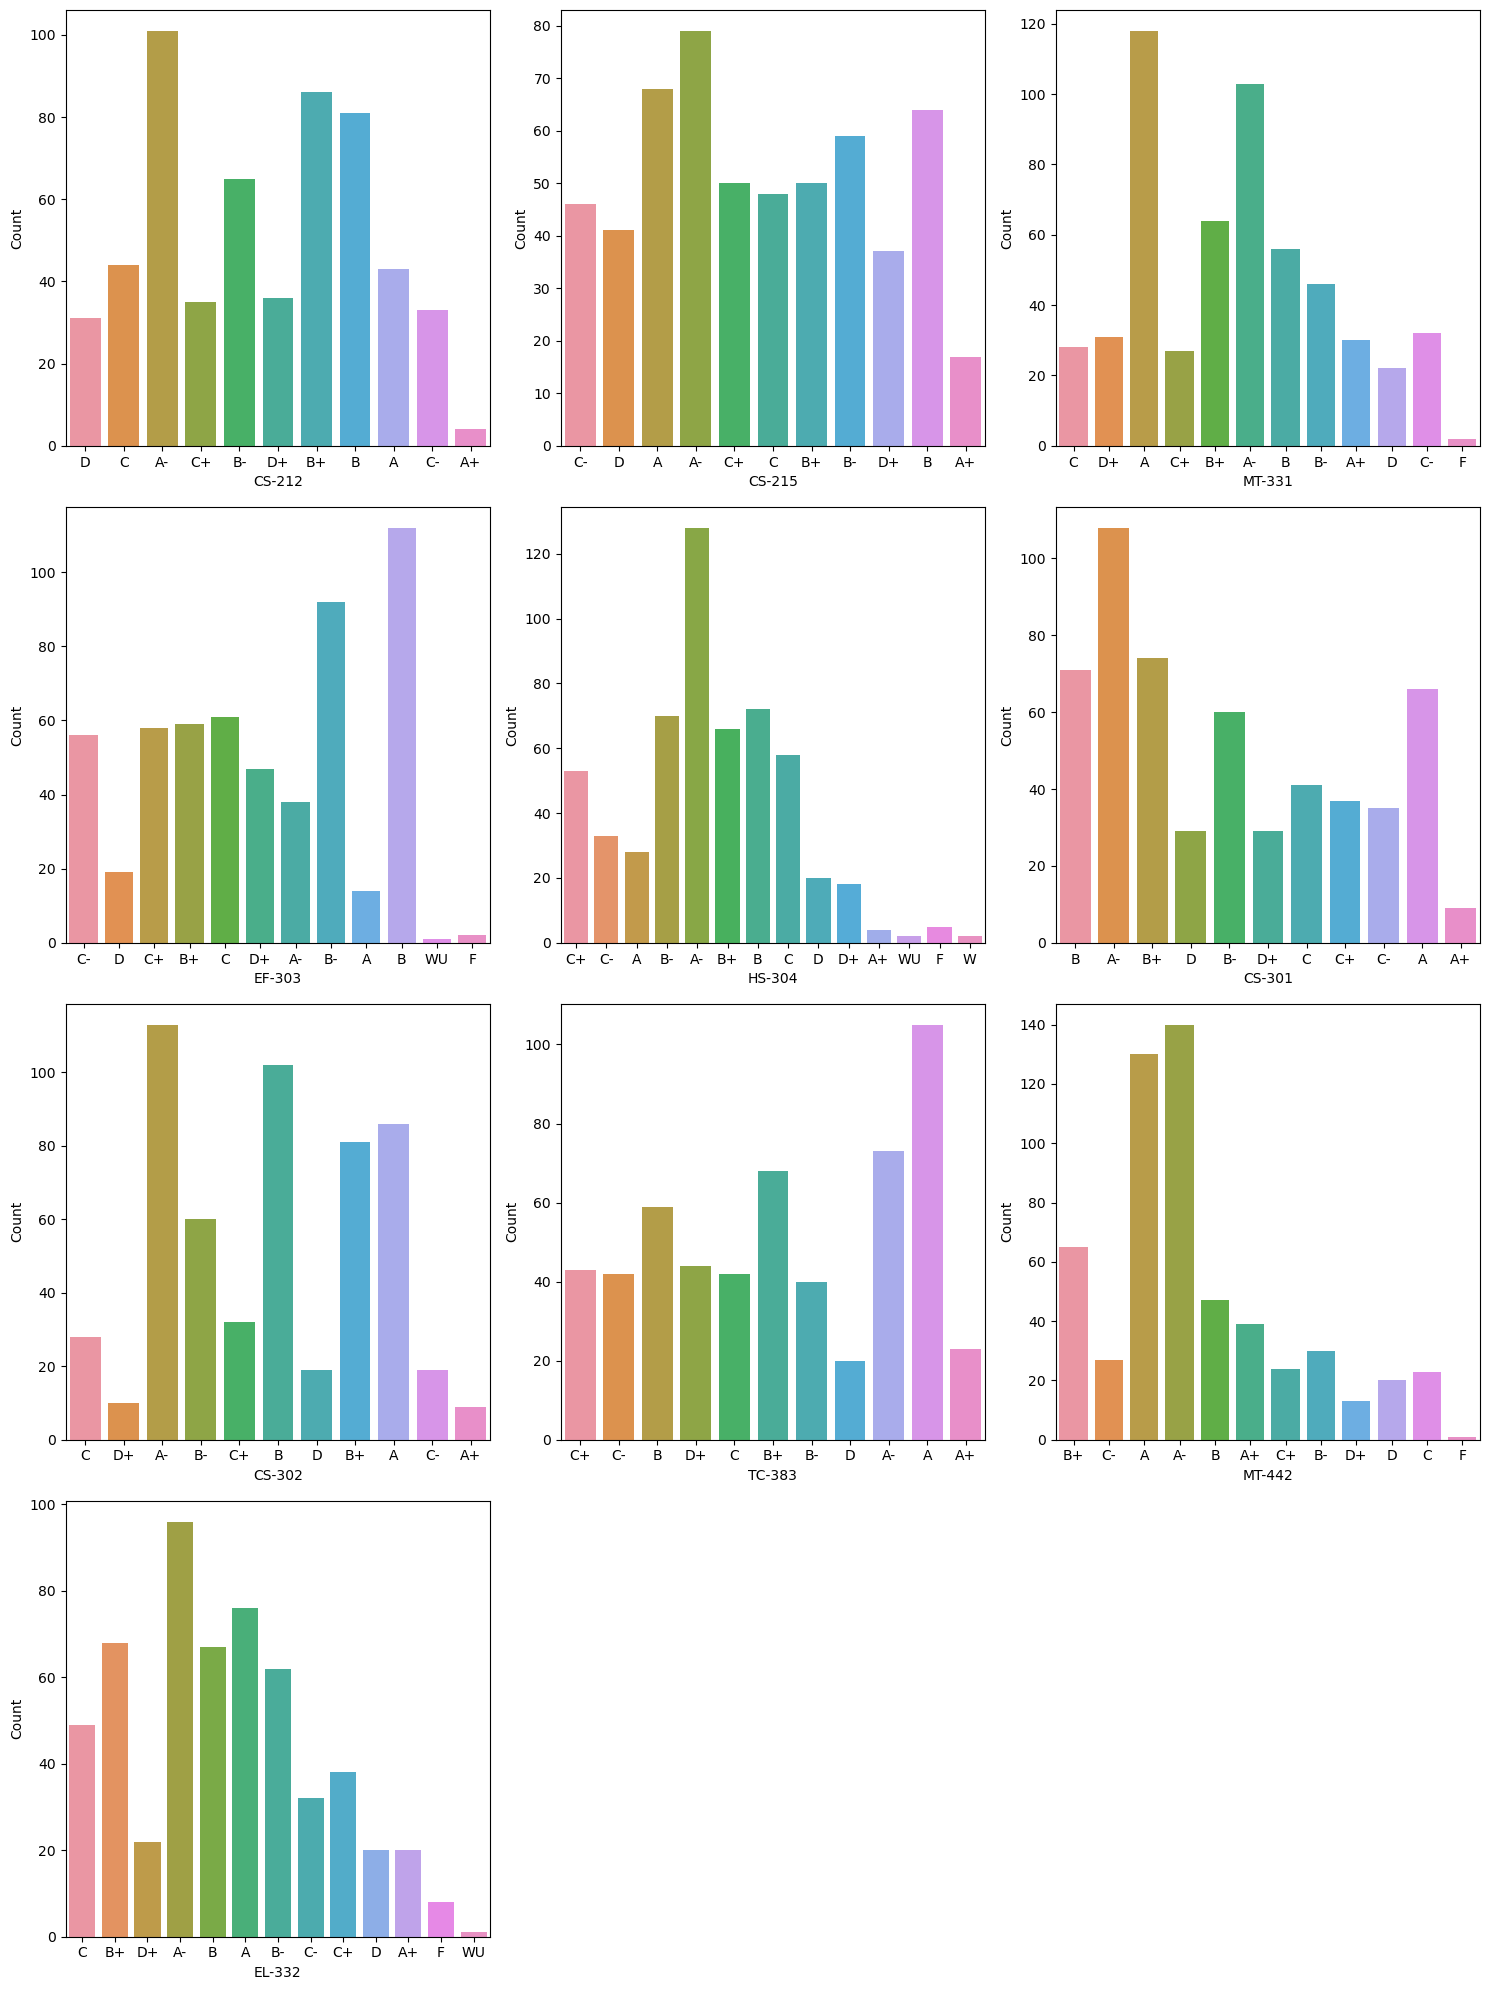

In [35]:
# Visualizing using count plot
plt.figure(figsize=(15,20))
index=1
for feature in cat_feature_3:
    if index<=len(cat_feature_3):
        plt.subplot(4,3,index)
        sns.countplot(x=feature,data=df)
        plt.xlabel(feature)
        plt.ylabel('Count')
        index=index+1
plt.tight_layout()

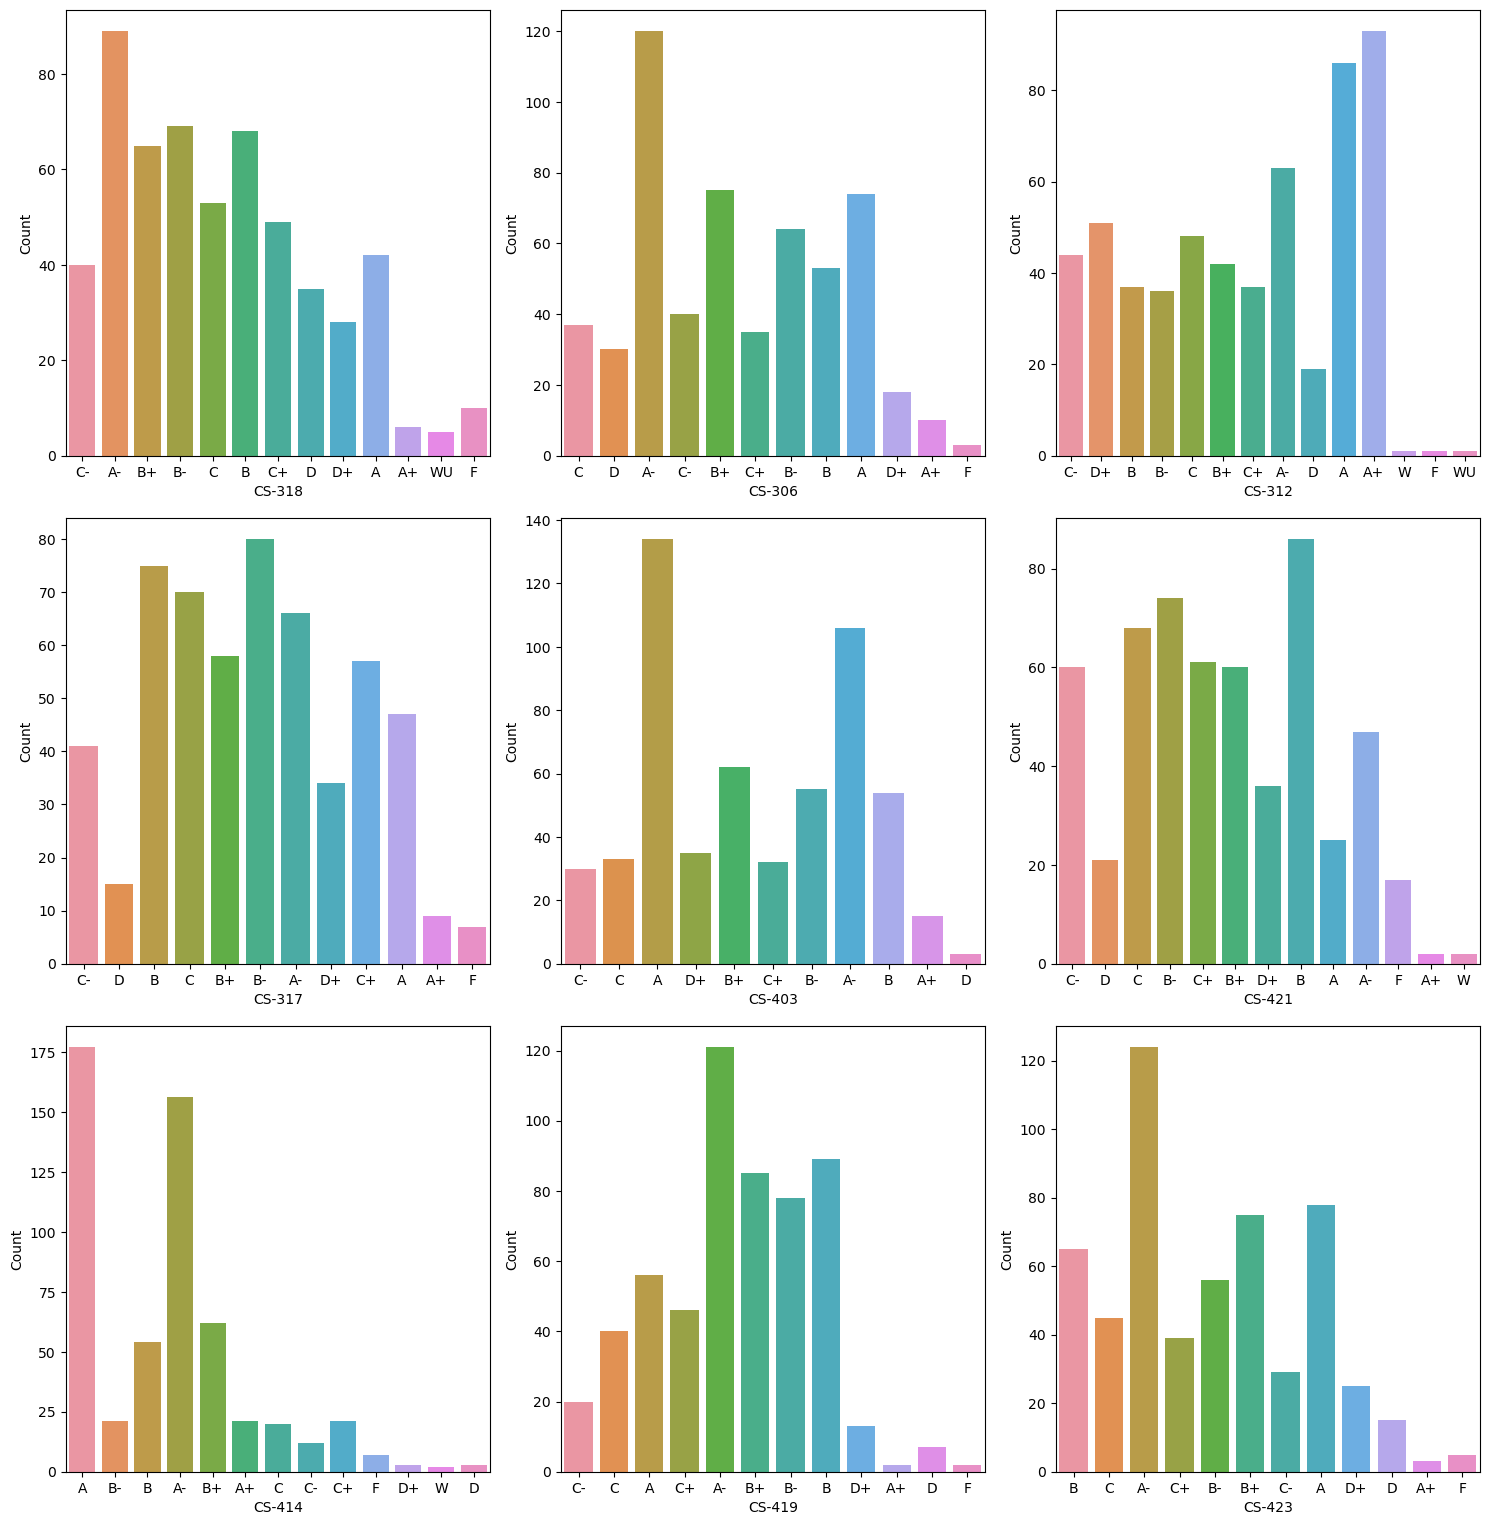

In [36]:
# Visualizing using count plot
plt.figure(figsize=(15,20))
index=1
for feature in cat_feature_4:
    if index<=len(cat_feature_4):
        plt.subplot(4,3,index)
        sns.countplot(x=feature,data=df)
        plt.xlabel(feature)
        plt.ylabel('Count')
        index=index+1
plt.tight_layout()

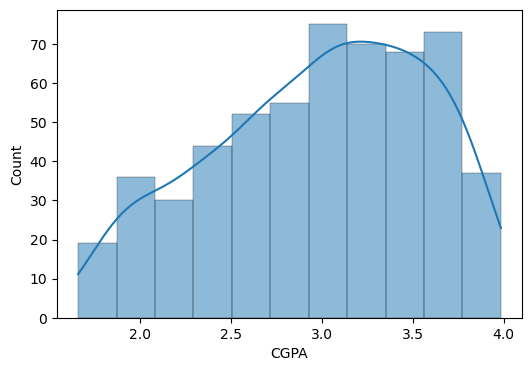

In [37]:
# Visualizing CGPA using histplot

plt.figure(figsize=(6,4))
sns.histplot(df['CGPA'],kde=True, linewidth=.2)
plt.show()

We can observed that the CGPA is left skewed. Need to perform further analysis to check skewness.

Visualizing each feature using barplot against CGPA

Bivariate Analysis

Visualizing each category features against CGPA 

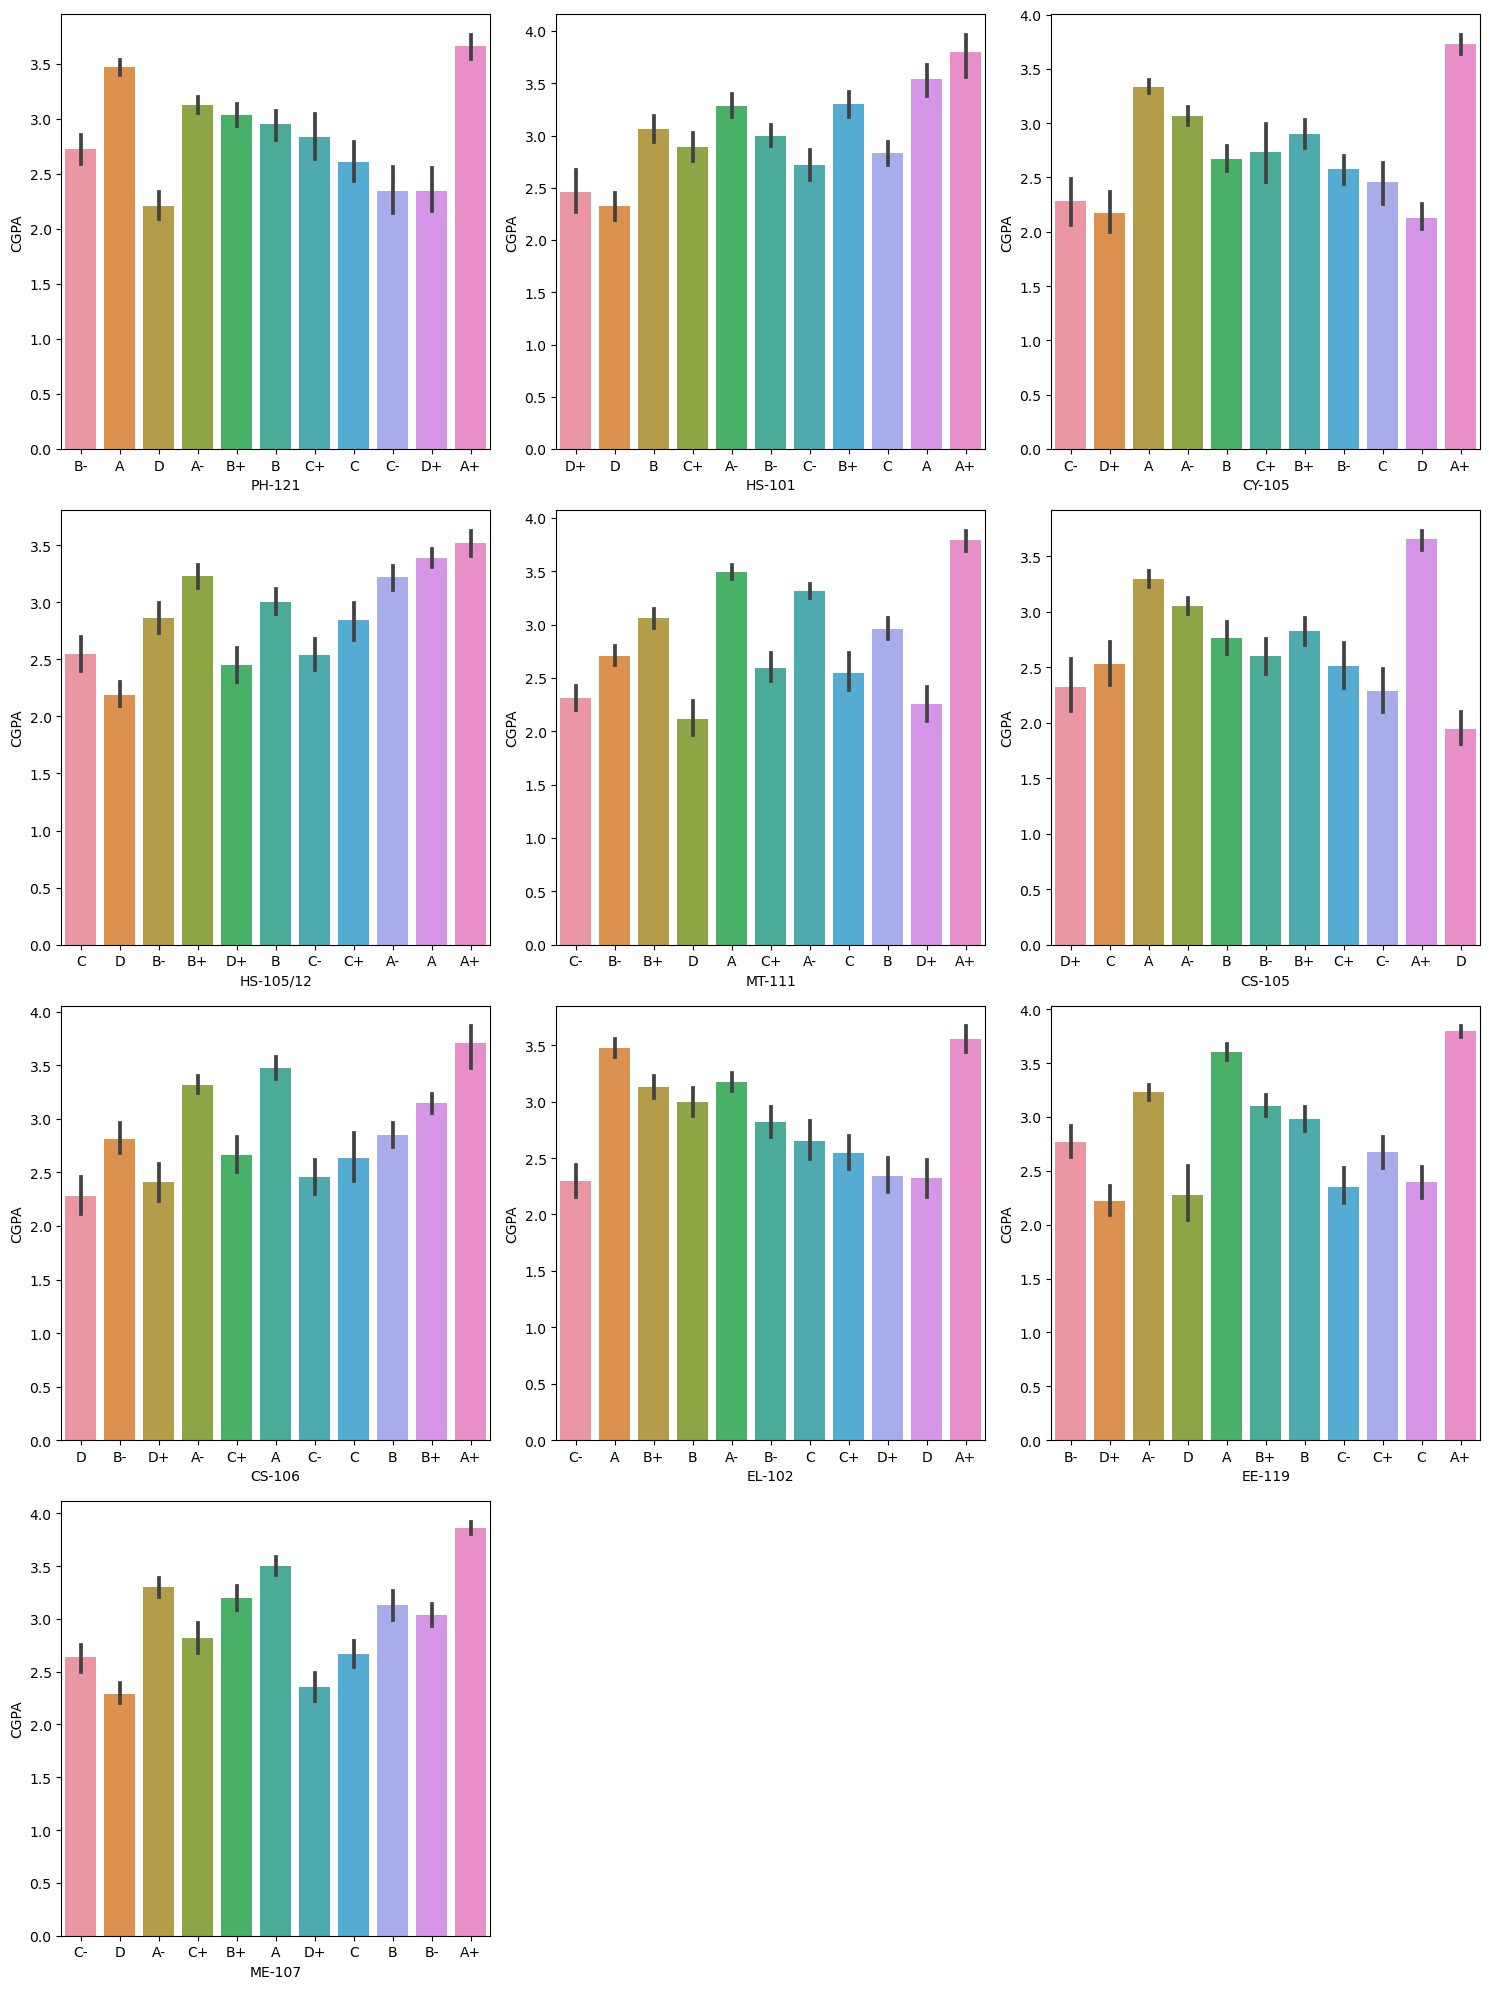

In [38]:
plt.figure(figsize=(15,20))
index=1
for feature in cat_feature_1:
    plt.subplot(4,3,index)
    sns.barplot(x=feature,y='CGPA',data=df)
    plt.xlabel(feature)
    plt.ylabel('CGPA')
    index+=1
plt.tight_layout()

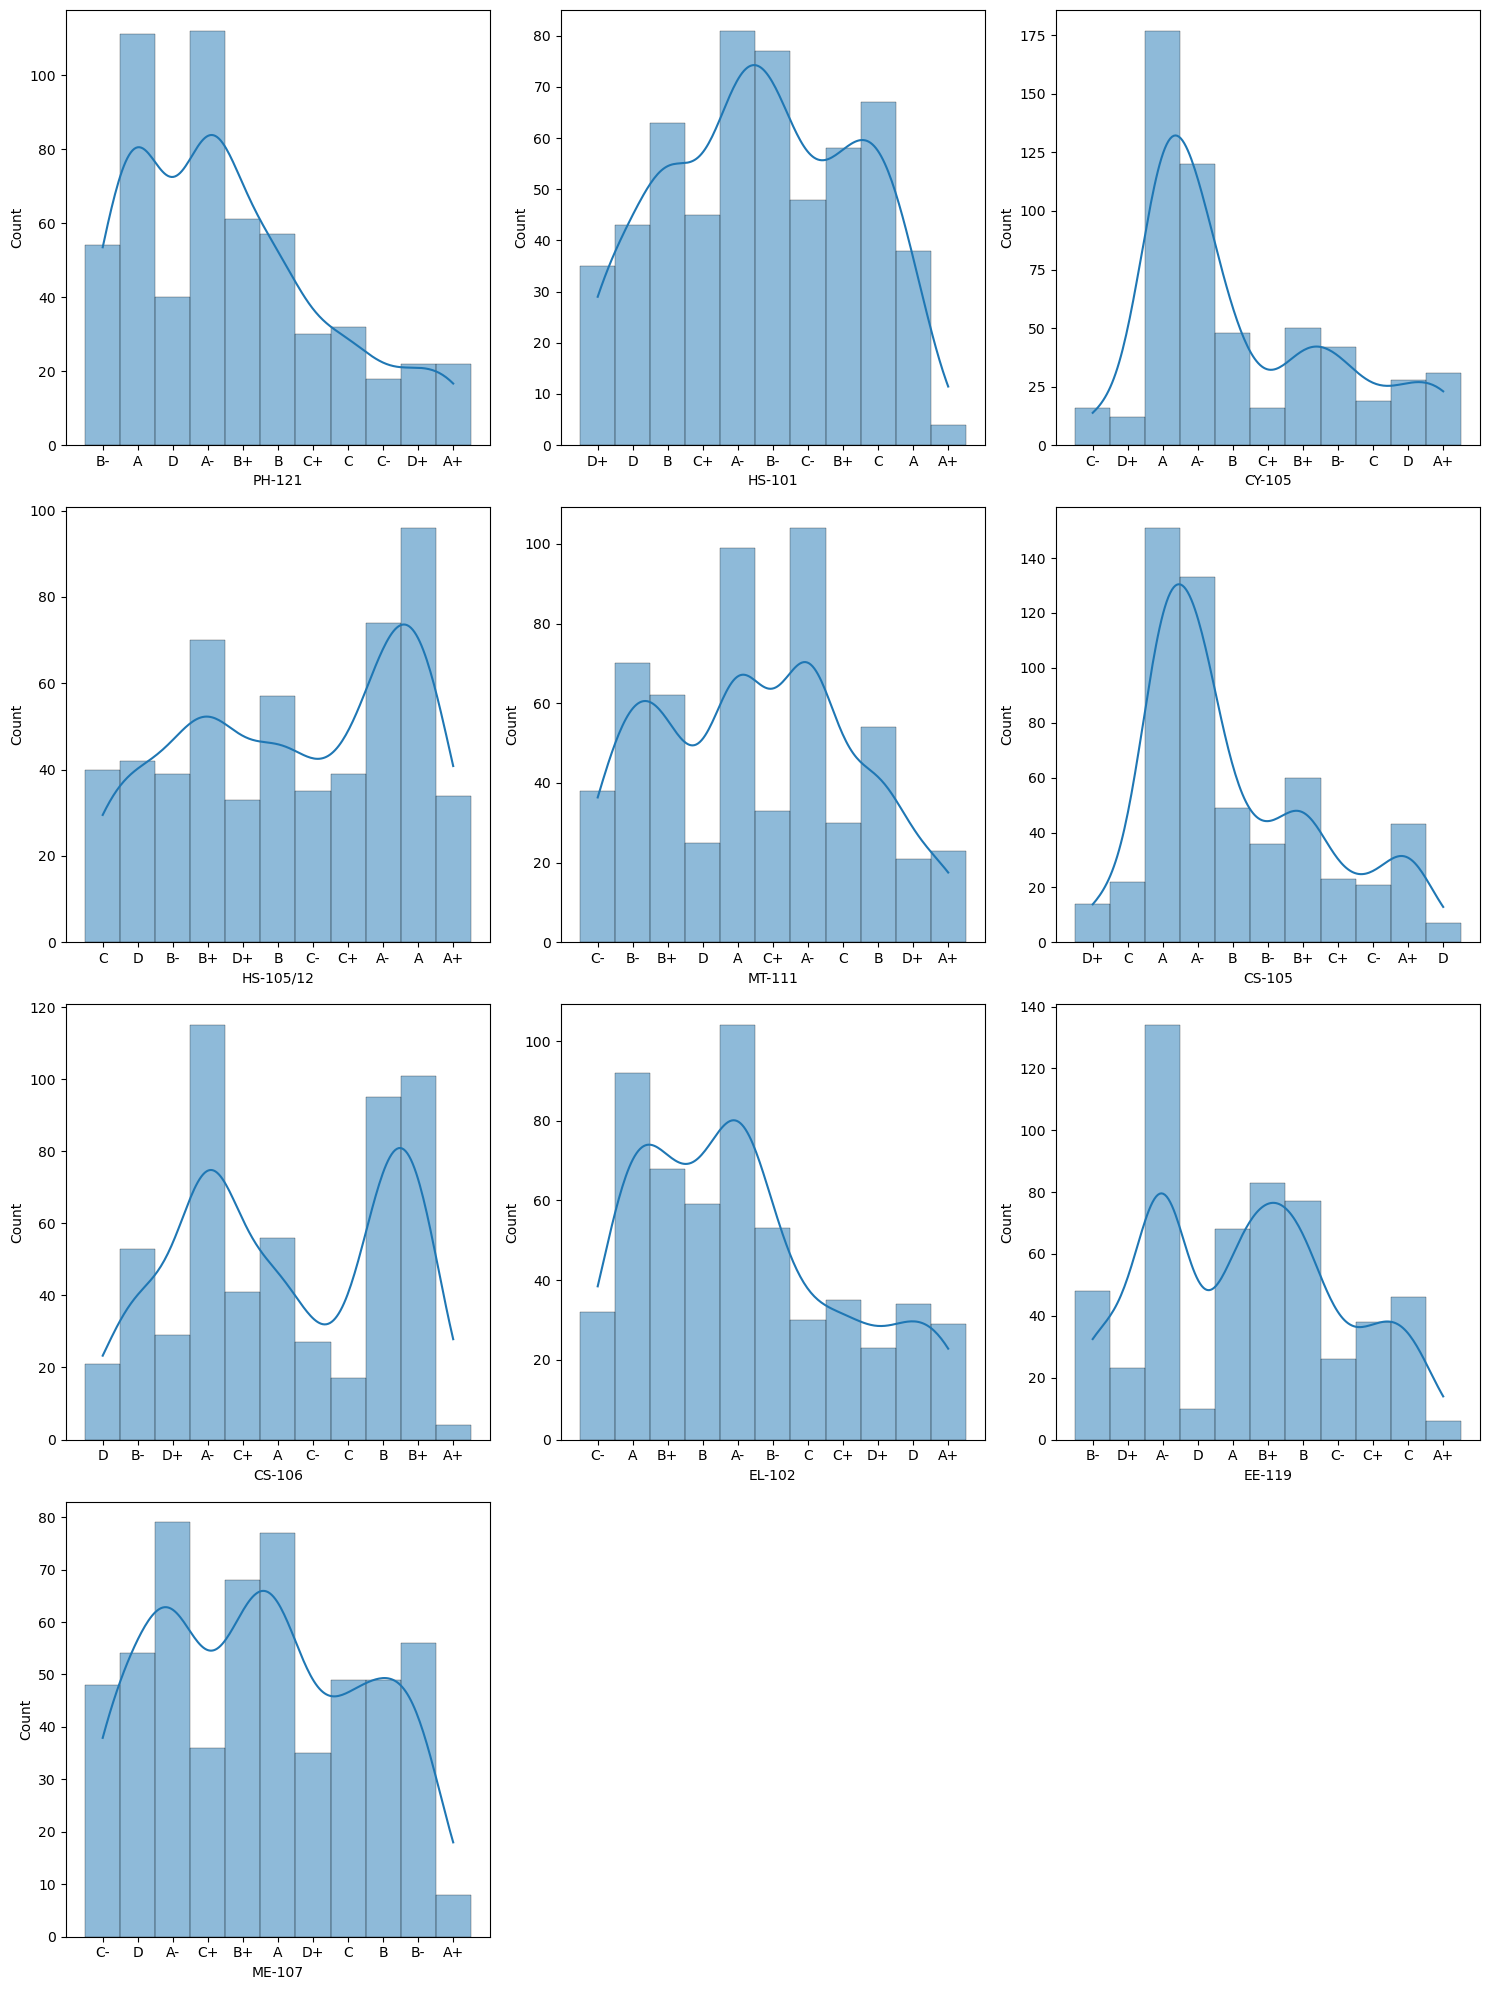

In [39]:
plt.figure(figsize=(15,20))
index=1
for feature in cat_feature_1:
    plt.subplot(4,3,index)
    sns.histplot(x=feature,data=df,kde=True, linewidth=.2)
    plt.xlabel(feature)
    plt.ylabel('Count')
    index+=1
plt.tight_layout()

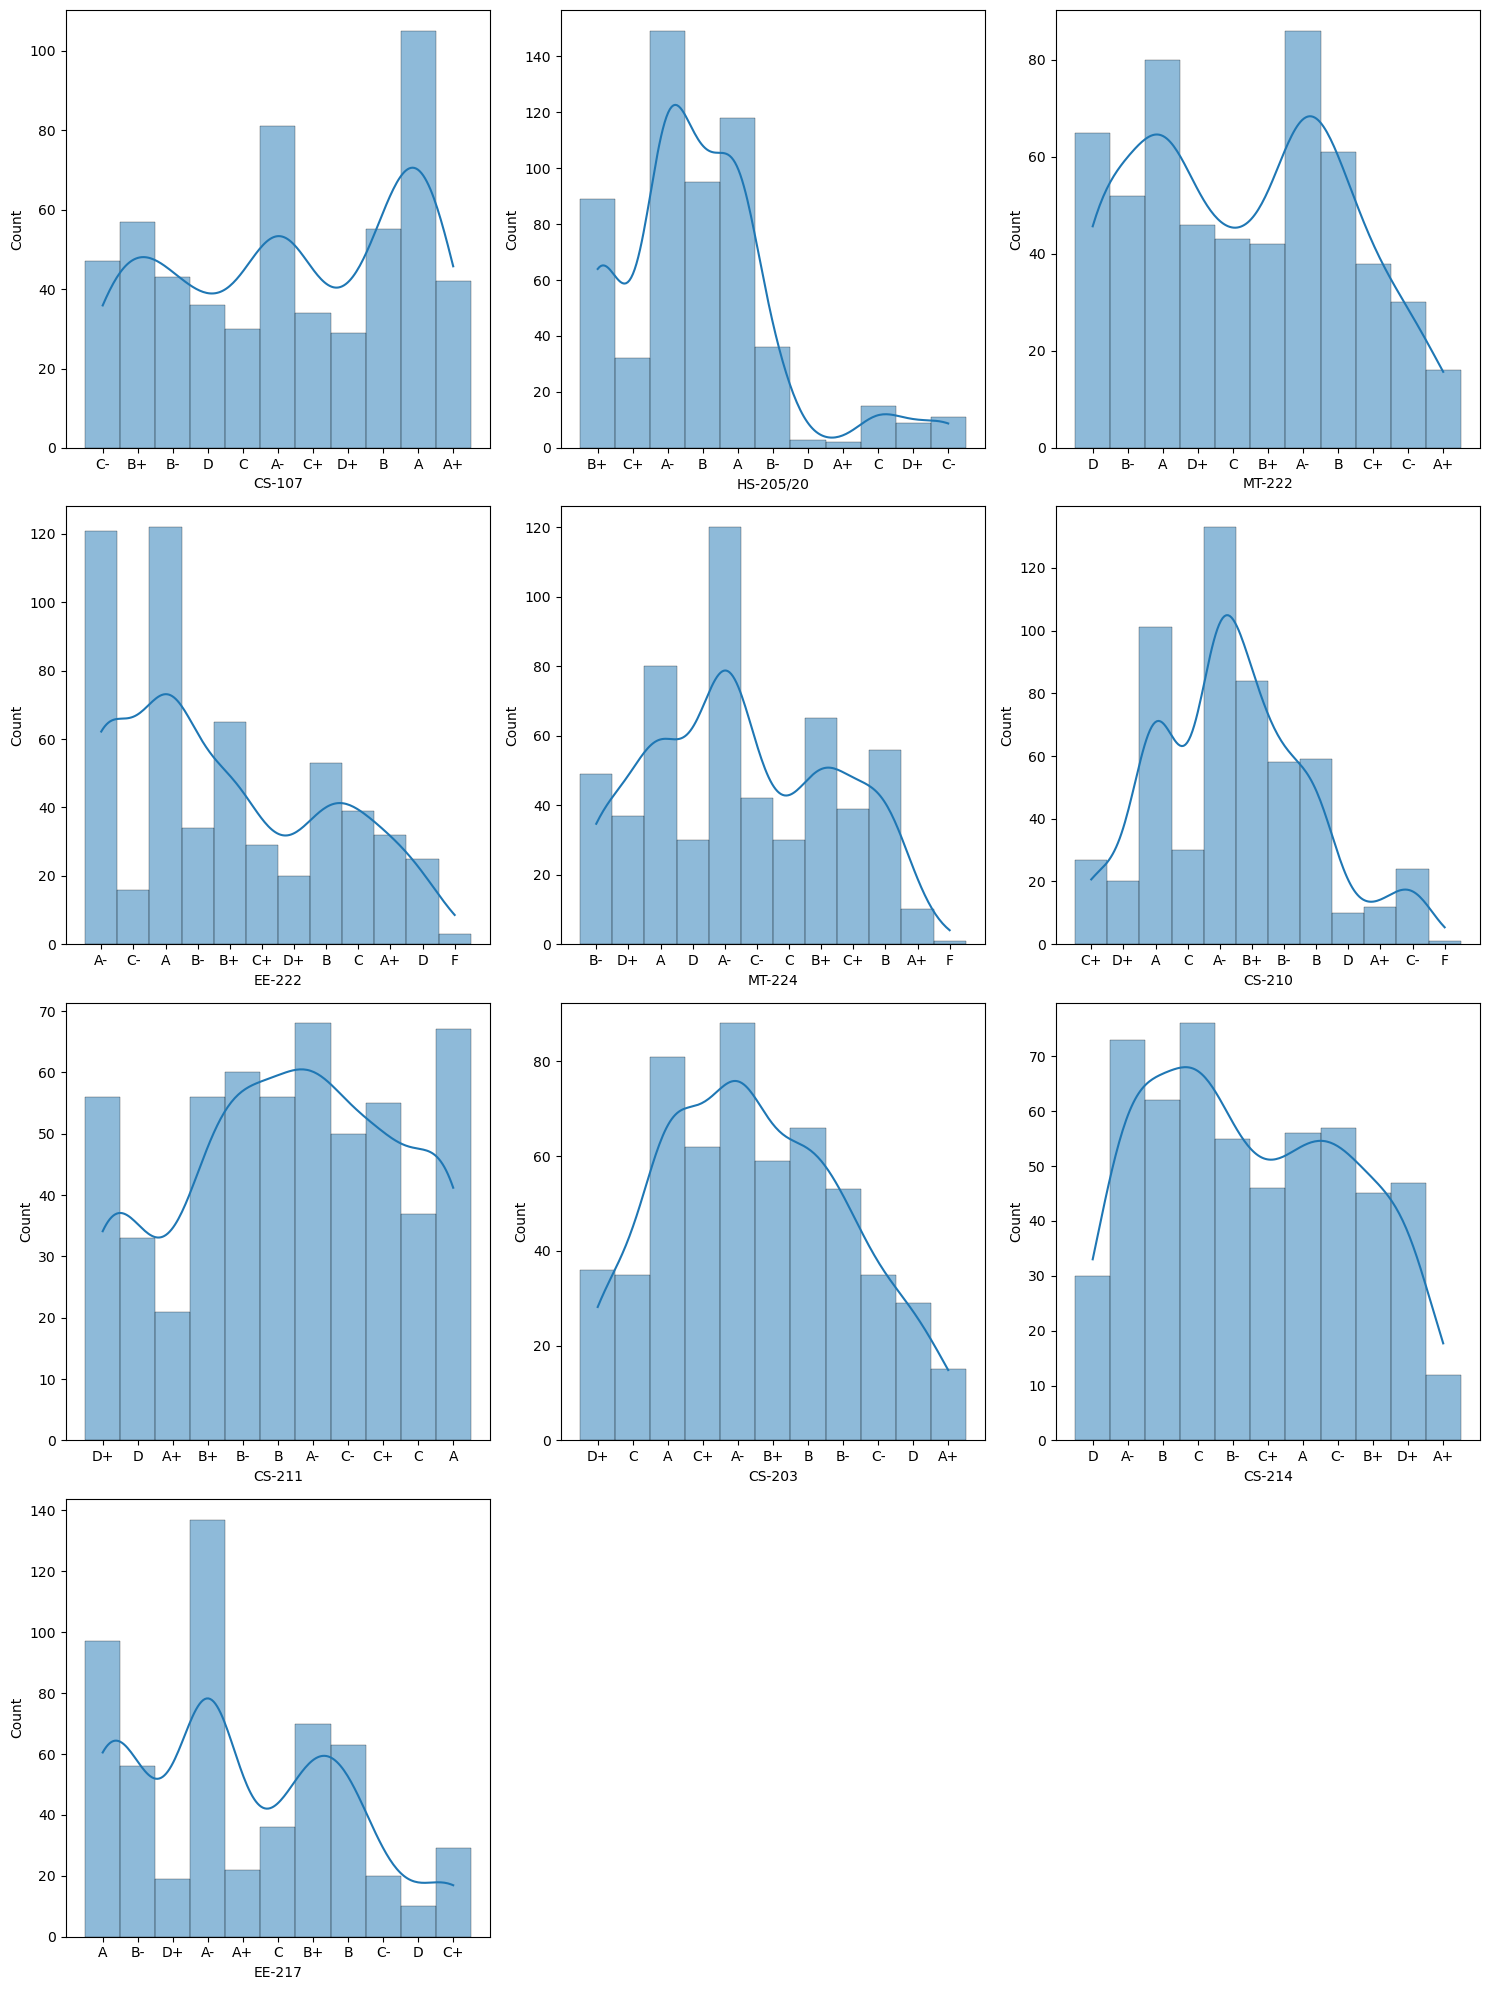

In [40]:
plt.figure(figsize=(15,20))
index=1
for feature in cat_feature_2:
    plt.subplot(4,3,index)
    sns.histplot(x=feature,data=df,kde=True, linewidth=.2)
    plt.xlabel(feature)
    plt.ylabel('Count')
    index+=1
plt.tight_layout()

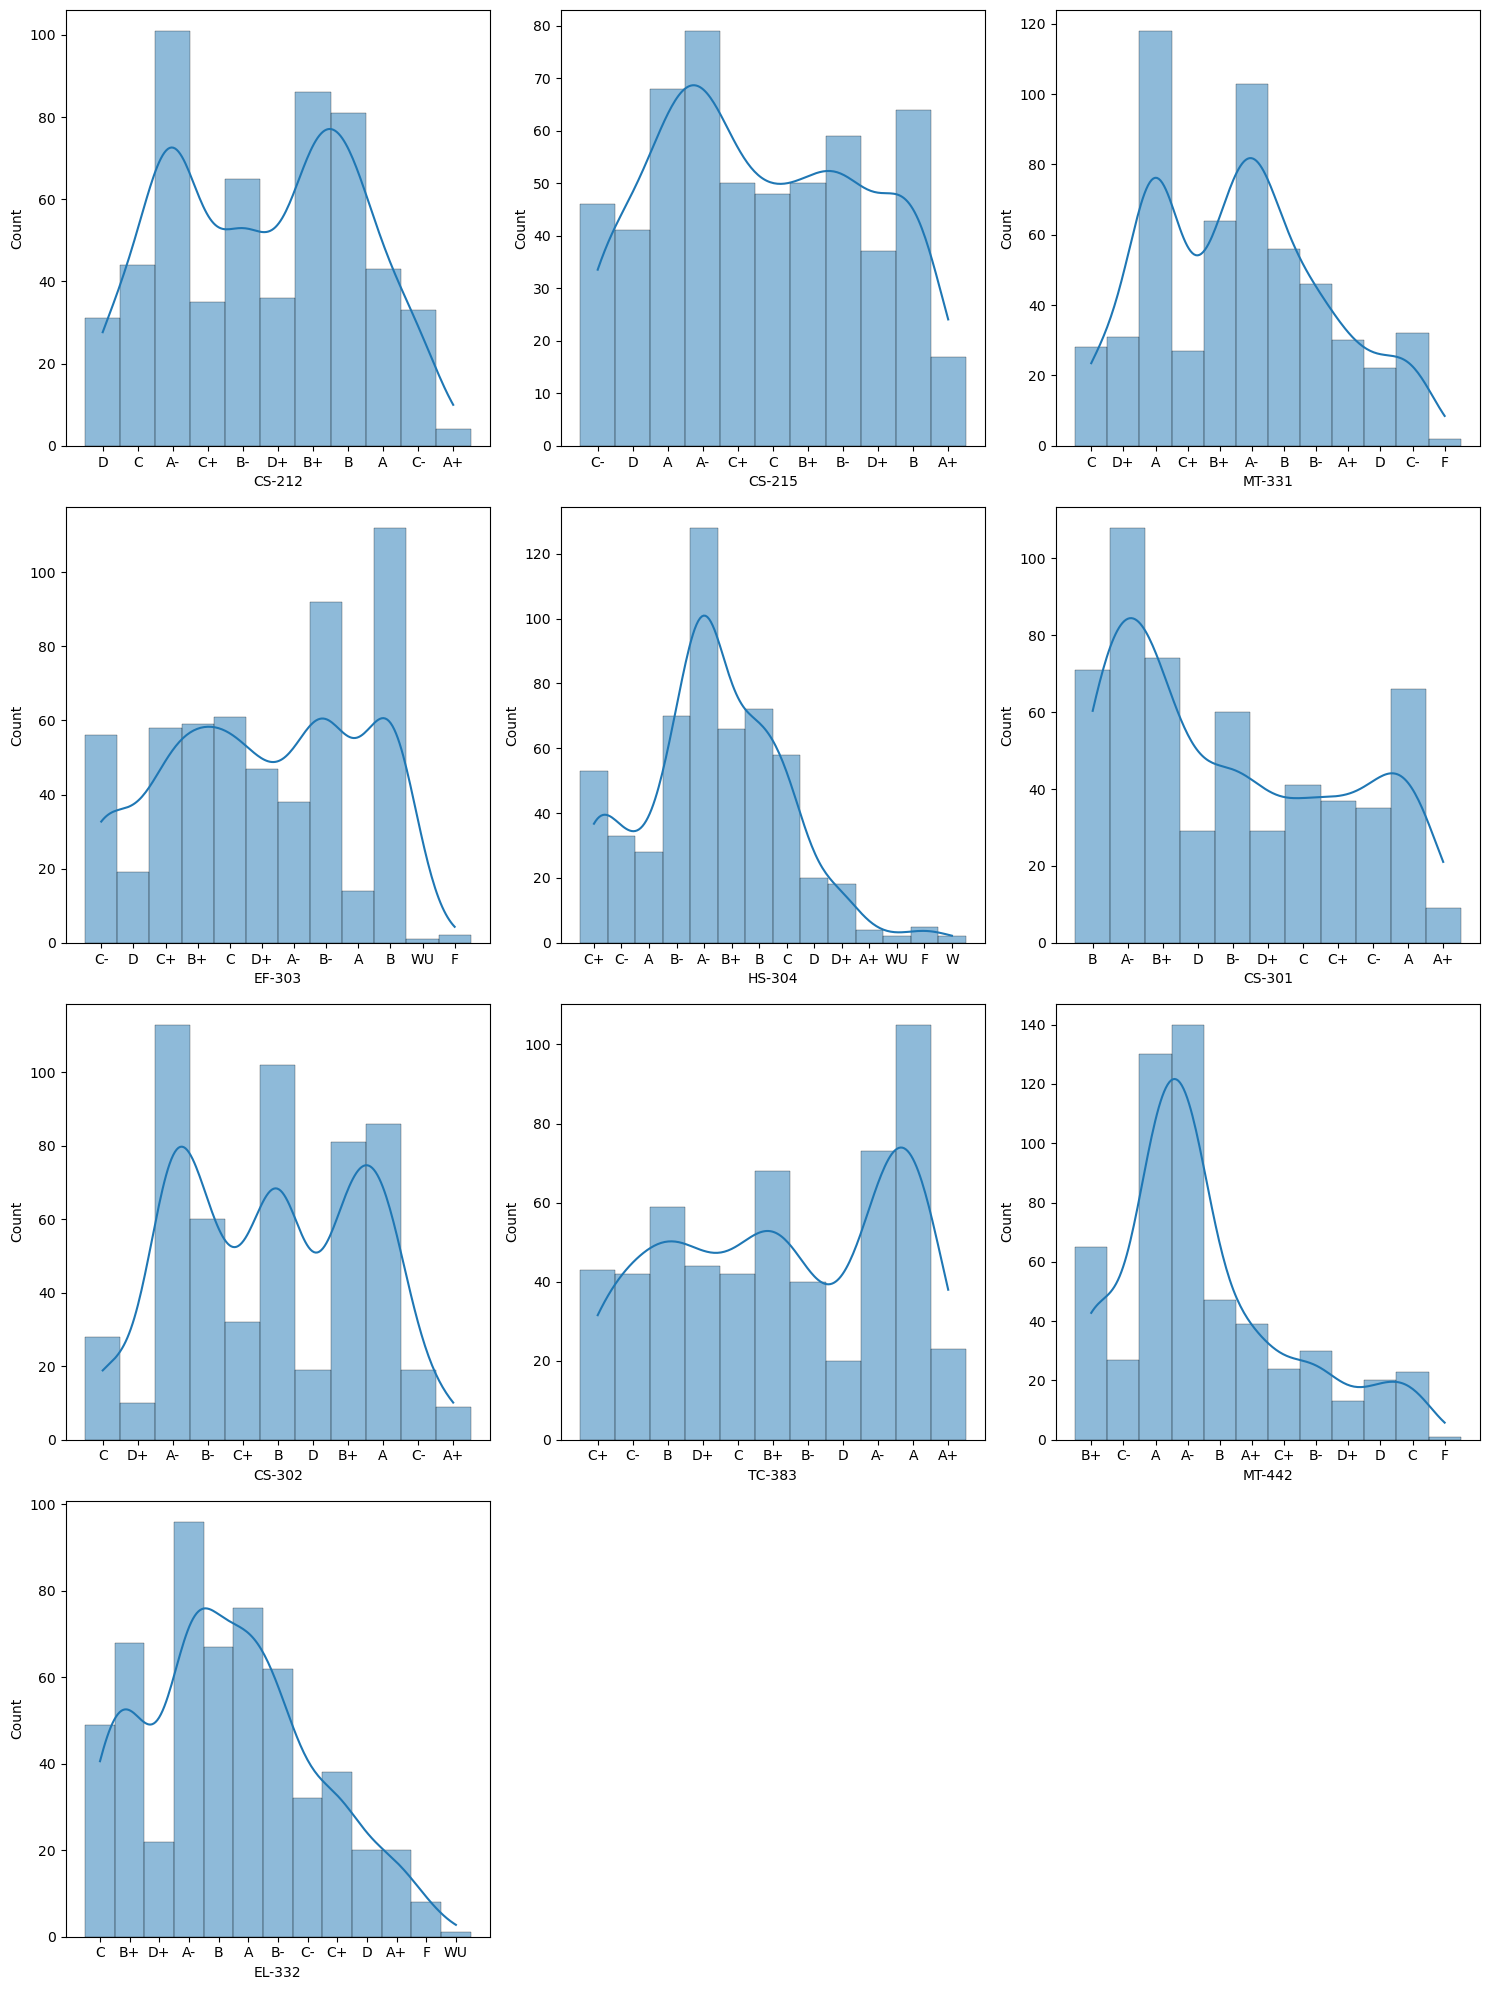

In [41]:
plt.figure(figsize=(15,20))
index=1
for feature in cat_feature_3:
    plt.subplot(4,3,index)
    sns.histplot(x=feature,data=df,kde=True, linewidth=.2)
    plt.xlabel(feature)
    plt.ylabel('Count')
    index+=1
plt.tight_layout()

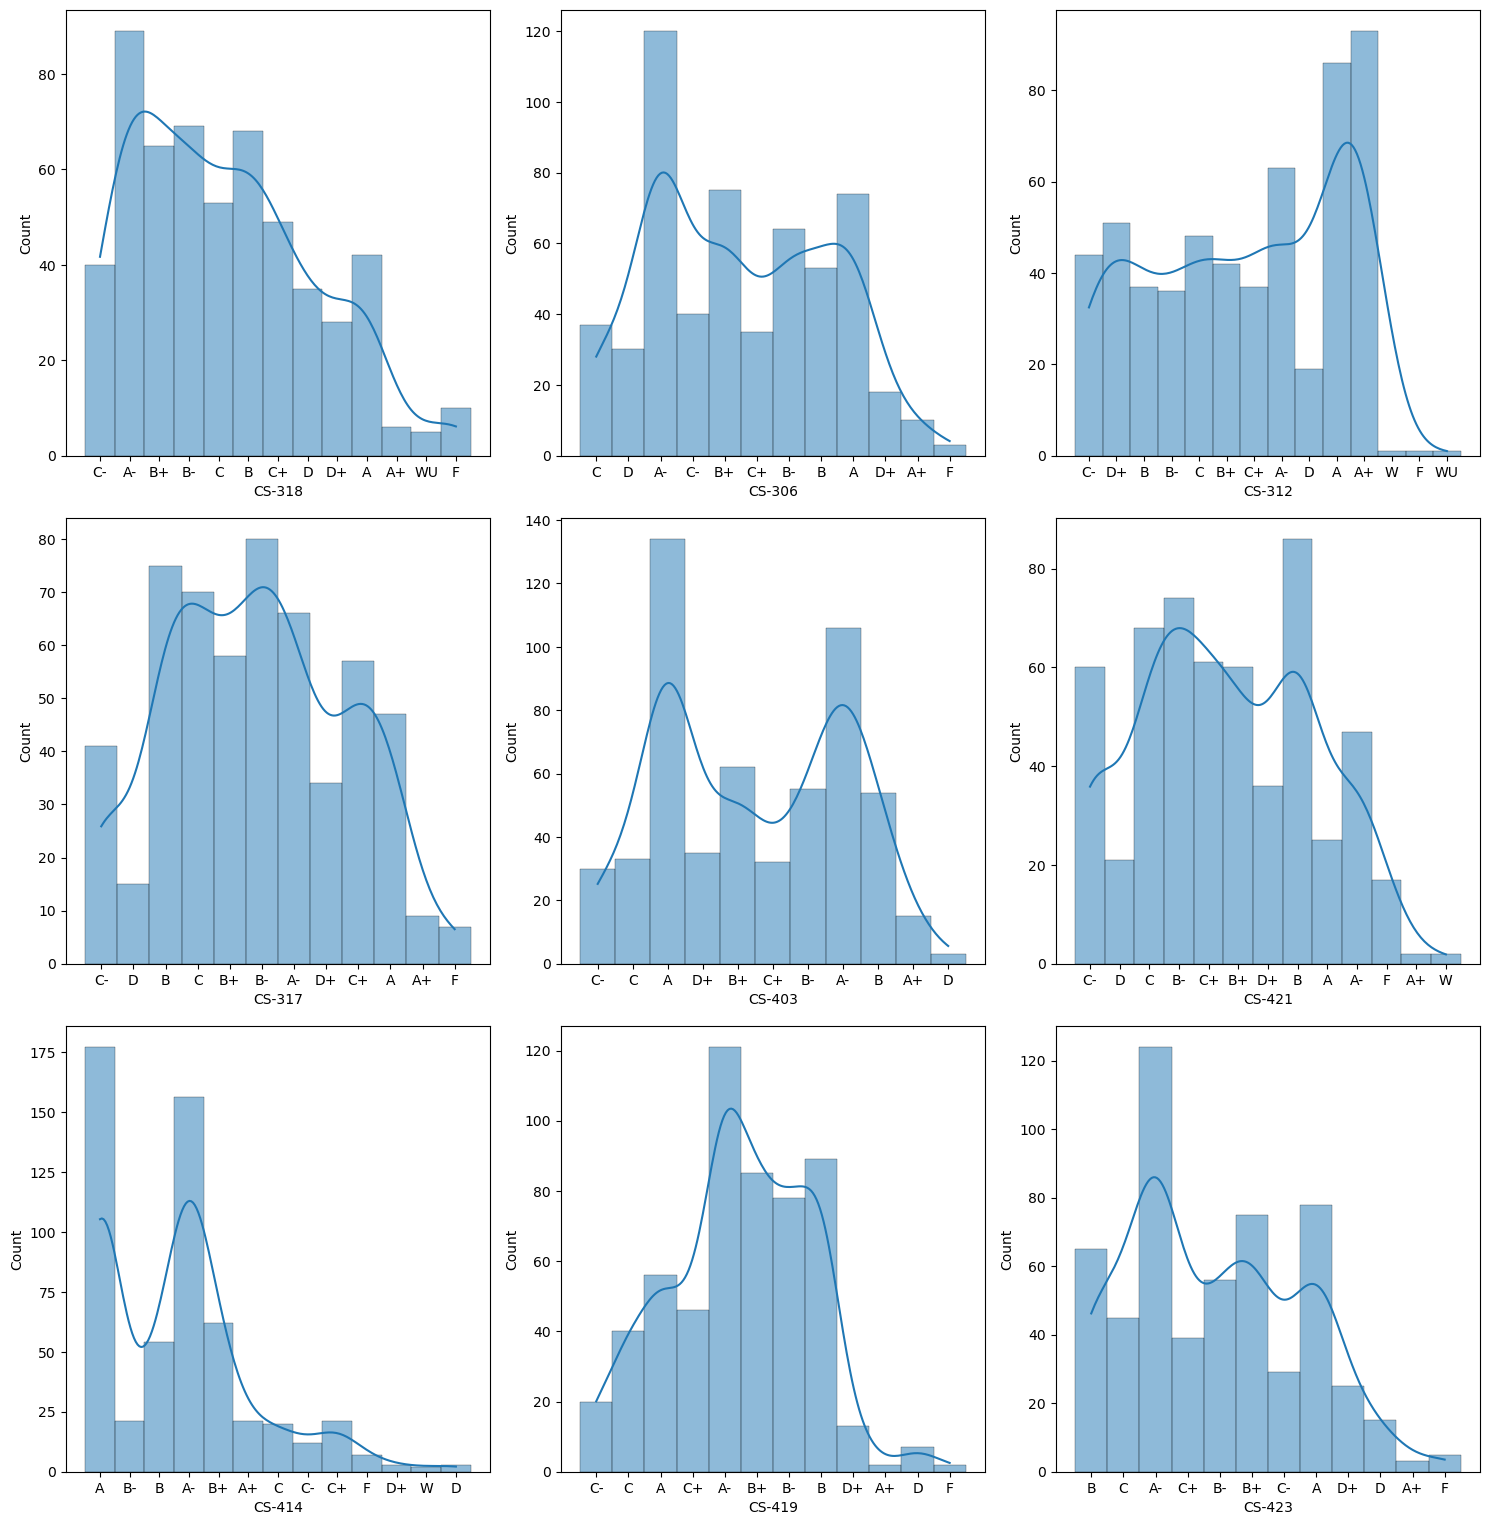

In [42]:
plt.figure(figsize=(15,20))
index=1
for feature in cat_feature_4:
    plt.subplot(4,3,index)
    sns.histplot(x=feature,data=df,kde=True, linewidth=.2)
    plt.xlabel(feature)
    plt.ylabel('Count')
    index+=1
plt.tight_layout()

# Encoding the dataset

Lets encode the categorical columns before further analysis.

In [43]:
# Checking the highest and lowest CGPA in the dataset

max_cgpa=df['CGPA'].max()
min_cgpa=df['CGPA'].min()

print('The max CGPA is {} and the min CGPA is {}'.format(max_cgpa,min_cgpa))

The max CGPA is 3.985 and the min CGPA is 1.658


There can be different approaches for encoding the grades. However, 'Direct Mapping to CGPA' Values can be considered as the best approach.

Here we will use the following to map grades to CGPA on a 4.0 scale:

A+: 4.0

A: 4.0

A-: 3.7

B+: 3.4

B: 3.0

B-: 2.7

C+: 2.4

C: 2.0

C-: 1.7

D+: 1.4

D: 1.0

F: 0.0

W: 0.0

WU: 0.0

In [44]:
for feature in df.columns:
    if feature not in ['Seat No.','CGPA']:
        df[feature]=df[feature].replace({'A+':4.0,'A':4.0,'A-':3.7,
                                         'B+':3.4,'B':3.0,'B-':2.7,
                                         'C+':2.4,'C':2.0,'C-':1.7,
                                         'D+':1.4,'D':1.0,'F':0.0,
                                         'W':0.0,'WU':0.0                                    
                                        })

In [45]:
# Checking the DataFrame after encoding

df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
0,CS-97001,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,1.7,3.4,1.0,3.7,2.7,2.4,1.4,1.4,1.0,4.0,1.0,1.7,2.0,1.7,2.4,3.0,2.0,2.4,3.4,2.0,1.7,2.0,1.7,1.7,1.7,1.7,4.0,1.7,3.0,2.205
1,CS-97002,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,3.4,2.4,2.7,1.7,1.4,1.4,1.0,2.0,1.0,2.7,2.0,1.0,1.4,1.0,1.7,3.7,1.4,1.7,1.7,2.0,3.7,1.0,1.4,1.0,2.0,1.0,2.7,2.0,2.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,2.7,3.7,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,3.7,4.0,4.0,2.4,4.0,3.4,3.7,3.0,4.0,3.4,3.7,3.7,3.0,3.0,4.0,2.0,4.0,4.0,3.7,3.608
3,CS-97004,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,1.0,3.0,1.4,2.7,1.0,2.0,3.4,2.4,1.0,1.4,1.0,1.0,1.4,1.0,2.7,1.0,2.7,1.4,1.7,1.4,3.4,1.7,1.4,2.0,1.4,1.7,3.0,2.4,2.4,1.906
4,CS-97005,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,2.0,4.0,4.0,3.7,3.7,3.7,2.7,4.0,3.7,4.0,3.7,3.7,2.4,1.7,3.7,2.7,3.7,2.4,3.7,3.7,2.7,3.7,2.7,3.4,3.4,2.7,4.0,3.7,3.7,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.7,4.0,3.0,3.7,3.7,4.0,4.0,4.0,4.0,4.0,3.4,3.7,3.7,4.0,4.0,3.4,3.4,3.0,3.798
567,CS-97568,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,4.0,3.4,2.4,3.7,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,3.4,3.4,4.0,4.0,3.0,3.7,2.0,3.772
568,CS-97569,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,4.0,2.7,3.0,3.4,3.0,3.7,4.0,3.4,3.0,4.0,3.4,3.0,4.0,3.0,2.7,3.4,3.4,4.0,3.4,3.0,2.4,3.4,3.7,3.0,4.0,3.4,2.0,3.4,3.7,3.470
569,CS-97570,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,4.0,2.4,1.0,1.0,3.0,2.7,3.0,2.7,2.0,2.7,1.4,1.4,2.4,1.0,2.0,2.0,2.4,1.7,1.7,1.0,2.7,3.4,1.0,3.0,3.0,1.7,2.0,3.0,2.7,2.193


All the categorical features has been encoded using the mapping technique. The feature 'Seat No.' is candidate's enrollment no. Hence can be removed it. 

In [46]:
#Dropping the feature 'Seat No.' from the dataset
df.drop('Seat No.',axis=1,inplace=True)

# Outliers Check

Only the dependent variable 'CGPA' is continuous variable. Hence check for outliers will be done on the dependent variable only.

Visualizing outliers using boxplot

<Axes: >

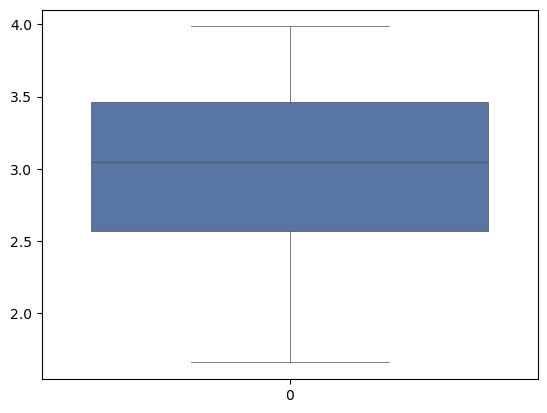

In [47]:
#Boxplot on CGPA 

sns.boxplot(df['CGPA'],palette='deep', linewidth=.5)

In [48]:
# Checking outliers through zscore 

z_score=np.abs(zscore(df['CGPA']))
z_score

0      1.321285
1      1.656065
2      1.062957
3      1.829402
4      0.791055
         ...   
566    1.385841
567    1.341657
568    0.828441
569    1.341678
570    2.089409
Name: CGPA, Length: 559, dtype: float64

In [49]:
print(np.where(z_score>3))

(array([], dtype=int64),)


No outliers are observed in the 'CGPA' feature

# Skewness Check

Since 'CGPA' is the only numerical variable. Hence skewness will be measured in CGPA feature only. Skewness in categorical features not required.  

In [50]:
# Checking skewness in 'CGPA'

df['CGPA'].skew()

-0.33614343042893347

Although 'CGPA' is slightly left skewed, but it is within the acceptable range.

# Statistical analysis of the dataset

In [51]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,3.055456,2.642934,3.312701,2.914848,3.028265,3.359213,2.999821,3.013775,3.048658,2.738283,2.970841,3.322361,2.729875,3.154383,2.919678,3.160823,2.730590,2.878354,2.655993,3.172272,2.830233,2.755993,3.083184,2.545259,2.818426,2.908945,3.111986,2.931127,3.264222,2.921646,2.680501,2.948122,2.951878,2.711091,3.140072,2.503578,3.428801,3.033810,2.981932,2.982506
std,0.937396,0.900567,0.865963,0.986092,0.896622,0.768430,0.817495,0.926573,0.801473,0.992824,0.982932,0.645567,1.031659,0.915915,0.945413,0.806395,0.957677,0.917461,0.926489,0.797240,0.876331,0.952451,0.933393,0.774348,0.880982,0.892256,0.774770,0.943473,0.858465,0.937231,0.980159,0.917117,1.026334,0.875811,0.848425,0.914884,0.771335,0.741633,0.883610,0.588974
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.658000
25%,2.400000,2.000000,3.000000,2.000000,2.400000,3.000000,2.700000,2.400000,2.400000,2.000000,2.000000,3.000000,1.700000,2.700000,2.200000,2.700000,2.000000,2.400000,2.000000,2.700000,2.000000,2.000000,2.400000,2.000000,2.400000,2.400000,2.700000,2.000000,3.000000,2.400000,2.000000,2.400000,2.000000,2.000000,2.700000,2.000000,3.000000,2.700000,2.400000,2.568000
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,3.000000,3.400000,3.400000,3.000000,3.400000,3.000000,3.400000,2.700000,3.000000,2.700000,3.400000,3.000000,2.700000,3.400000,2.700000,3.000000,3.000000,3.400000,3.000000,3.700000,3.000000,2.700000,3.000000,3.400000,2.700000,3.400000,2.700000,3.700000,3.000000,3.400000,3.043000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,3.700000,3.700000,3.700000,3.700000,4.000000,3.000000,3.700000,3.700000,3.700000,3.700000,4.000000,3.700000,3.400000,3.700000,4.000000,3.400000,4.000000,3.000000,4.000000,3.700000,3.700000,3.464000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


1. There are no null values present in the dataset as the count is same for all features.
2. No skewness can be observed in CGPA as mean and median are almost equivalent.

In [52]:
# Checking the correlation amoung features
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
PH-121,1.000000,0.381141,0.614002,0.531202,0.468480,0.641748,0.262966,0.408953,0.654642,0.551792,0.491995,0.309341,0.564027,0.553585,0.342154,0.522061,0.333943,0.474628,0.427357,0.444593,0.372099,0.531827,0.219040,0.246366,0.529605,0.345231,0.500321,0.220882,0.505082,0.438849,0.487029,0.513553,0.047038,0.505353,0.381307,0.371353,0.220907,0.494483,0.118329,0.648369
HS-101,0.381141,1.000000,0.336003,0.489466,0.450214,0.410850,0.356117,0.364954,0.299593,0.349183,0.518565,0.207218,0.422381,0.409494,0.265547,0.356887,0.346445,0.274683,0.482126,0.381691,0.372742,0.441614,0.161399,0.266738,0.475704,0.328109,0.396503,0.366229,0.268036,0.431511,0.480986,0.479044,0.236617,0.412611,0.267079,0.356599,0.290625,0.306020,0.259924,0.553046
CY-105,0.614002,0.336003,1.000000,0.560193,0.540812,0.594299,0.356011,0.444383,0.550521,0.454117,0.476855,0.272682,0.495437,0.448993,0.424841,0.500745,0.457417,0.395317,0.501964,0.405436,0.457871,0.562852,0.385124,0.382683,0.425629,0.413960,0.501783,0.340231,0.475425,0.394647,0.384355,0.432732,0.271694,0.505298,0.546084,0.407540,0.098562,0.502591,0.150523,0.653538
HS-105/12,0.531202,0.489466,0.560193,1.000000,0.512662,0.516788,0.515456,0.357302,0.459921,0.361899,0.538140,0.196850,0.493697,0.381883,0.415850,0.506604,0.400656,0.328907,0.450156,0.399569,0.527340,0.519629,0.313148,0.469433,0.399642,0.505537,0.504260,0.481592,0.374770,0.408978,0.408739,0.551768,0.316345,0.524040,0.539262,0.464676,0.155108,0.515638,0.271207,0.658767
MT-111,0.468480,0.450214,0.540812,0.512662,1.000000,0.390146,0.531394,0.546407,0.423556,0.472022,0.485670,0.329105,0.511180,0.384184,0.594327,0.638786,0.550020,0.522335,0.584388,0.554360,0.600907,0.581743,0.447238,0.479676,0.351679,0.602135,0.546452,0.571714,0.425761,0.618557,0.398007,0.523115,0.523905,0.593646,0.478272,0.573839,0.272537,0.559940,0.430045,0.755750
CS-105,0.641748,0.410850,0.594299,0.516788,0.390146,1.000000,0.256259,0.330567,0.571467,0.453746,0.520364,0.165782,0.493313,0.509638,0.241253,0.435426,0.351278,0.418174,0.445817,0.355741,0.333326,0.480800,0.257098,0.232607,0.552772,0.272290,0.490605,0.243828,0.480702,0.389812,0.491214,0.462784,0.069722,0.408094,0.321458,0.305087,0.190293,0.371543,0.078384,0.586838
CS-106,0.262966,0.356117,0.356011,0.515456,0.531394,0.256259,1.000000,0.315712,0.282014,0.312160,0.443728,0.160458,0.378520,0.157479,0.463552,0.491281,0.397140,0.324718,0.470071,0.371372,0.635157,0.446762,0.349168,0.527094,0.195441,0.552392,0.390530,0.581382,0.276881,0.416678,0.267759,0.388200,0.536179,0.433357,0.522026,0.448202,0.129608,0.495066,0.406179,0.579242
EL-102,0.408953,0.364954,0.444383,0.357302,0.546407,0.330567,0.315712,1.000000,0.435044,0.458829,0.423934,0.406643,0.503997,0.450976,0.502406,0.525394,0.506911,0.499199,0.526050,0.586478,0.422032,0.490389,0.356658,0.249405,0.422374,0.450340,0.422384,0.389032,0.384241,0.524343,0.391579,0.458838,0.348616,0.481329,0.352304,0.401722,0.309799,0.399535,0.393496,0.653846
EE-119,0.654642,0.299593,0.550521,0.459921,0.423556,0.571467,0.282014,0.435044,1.000000,0.587277,0.410846,0.353473,0.469997,0.461823,0.410858,0.516712,0.460170,0.486094,0.476068,0.391325,0.410747,0.546174,0.346659,0.300541,0.517999,0.411282,0.487148,0.255091,0.478280,0.471099,0.390945,0.449223,0.181131,0.485466,0.403285,0.415716,0.251673,0.509567,0.258348,0.663253
ME-107,0.551792,0.349183,0.454117,0.361899,0.472022,0.453746,0.312160,0.458829,0.587277,1.000000,0.340056,0.401943,0.504152,0.413699,0.486027,0.552063,0.498607,0.628393,0.559512,0.455418,0.481835,0.582639,0.357922,0.287286,0.448685,0.456192,0.450011,0.312837,0.468403,0.509641,0.365296,0.427513,0.242303,0.494795,0.372688,0.434817,0.197778,0.496217,0.256839,0.674493


1. All the features are positively correlated with the dependent variable.
2. Moderate to highly correlated features can be observed.

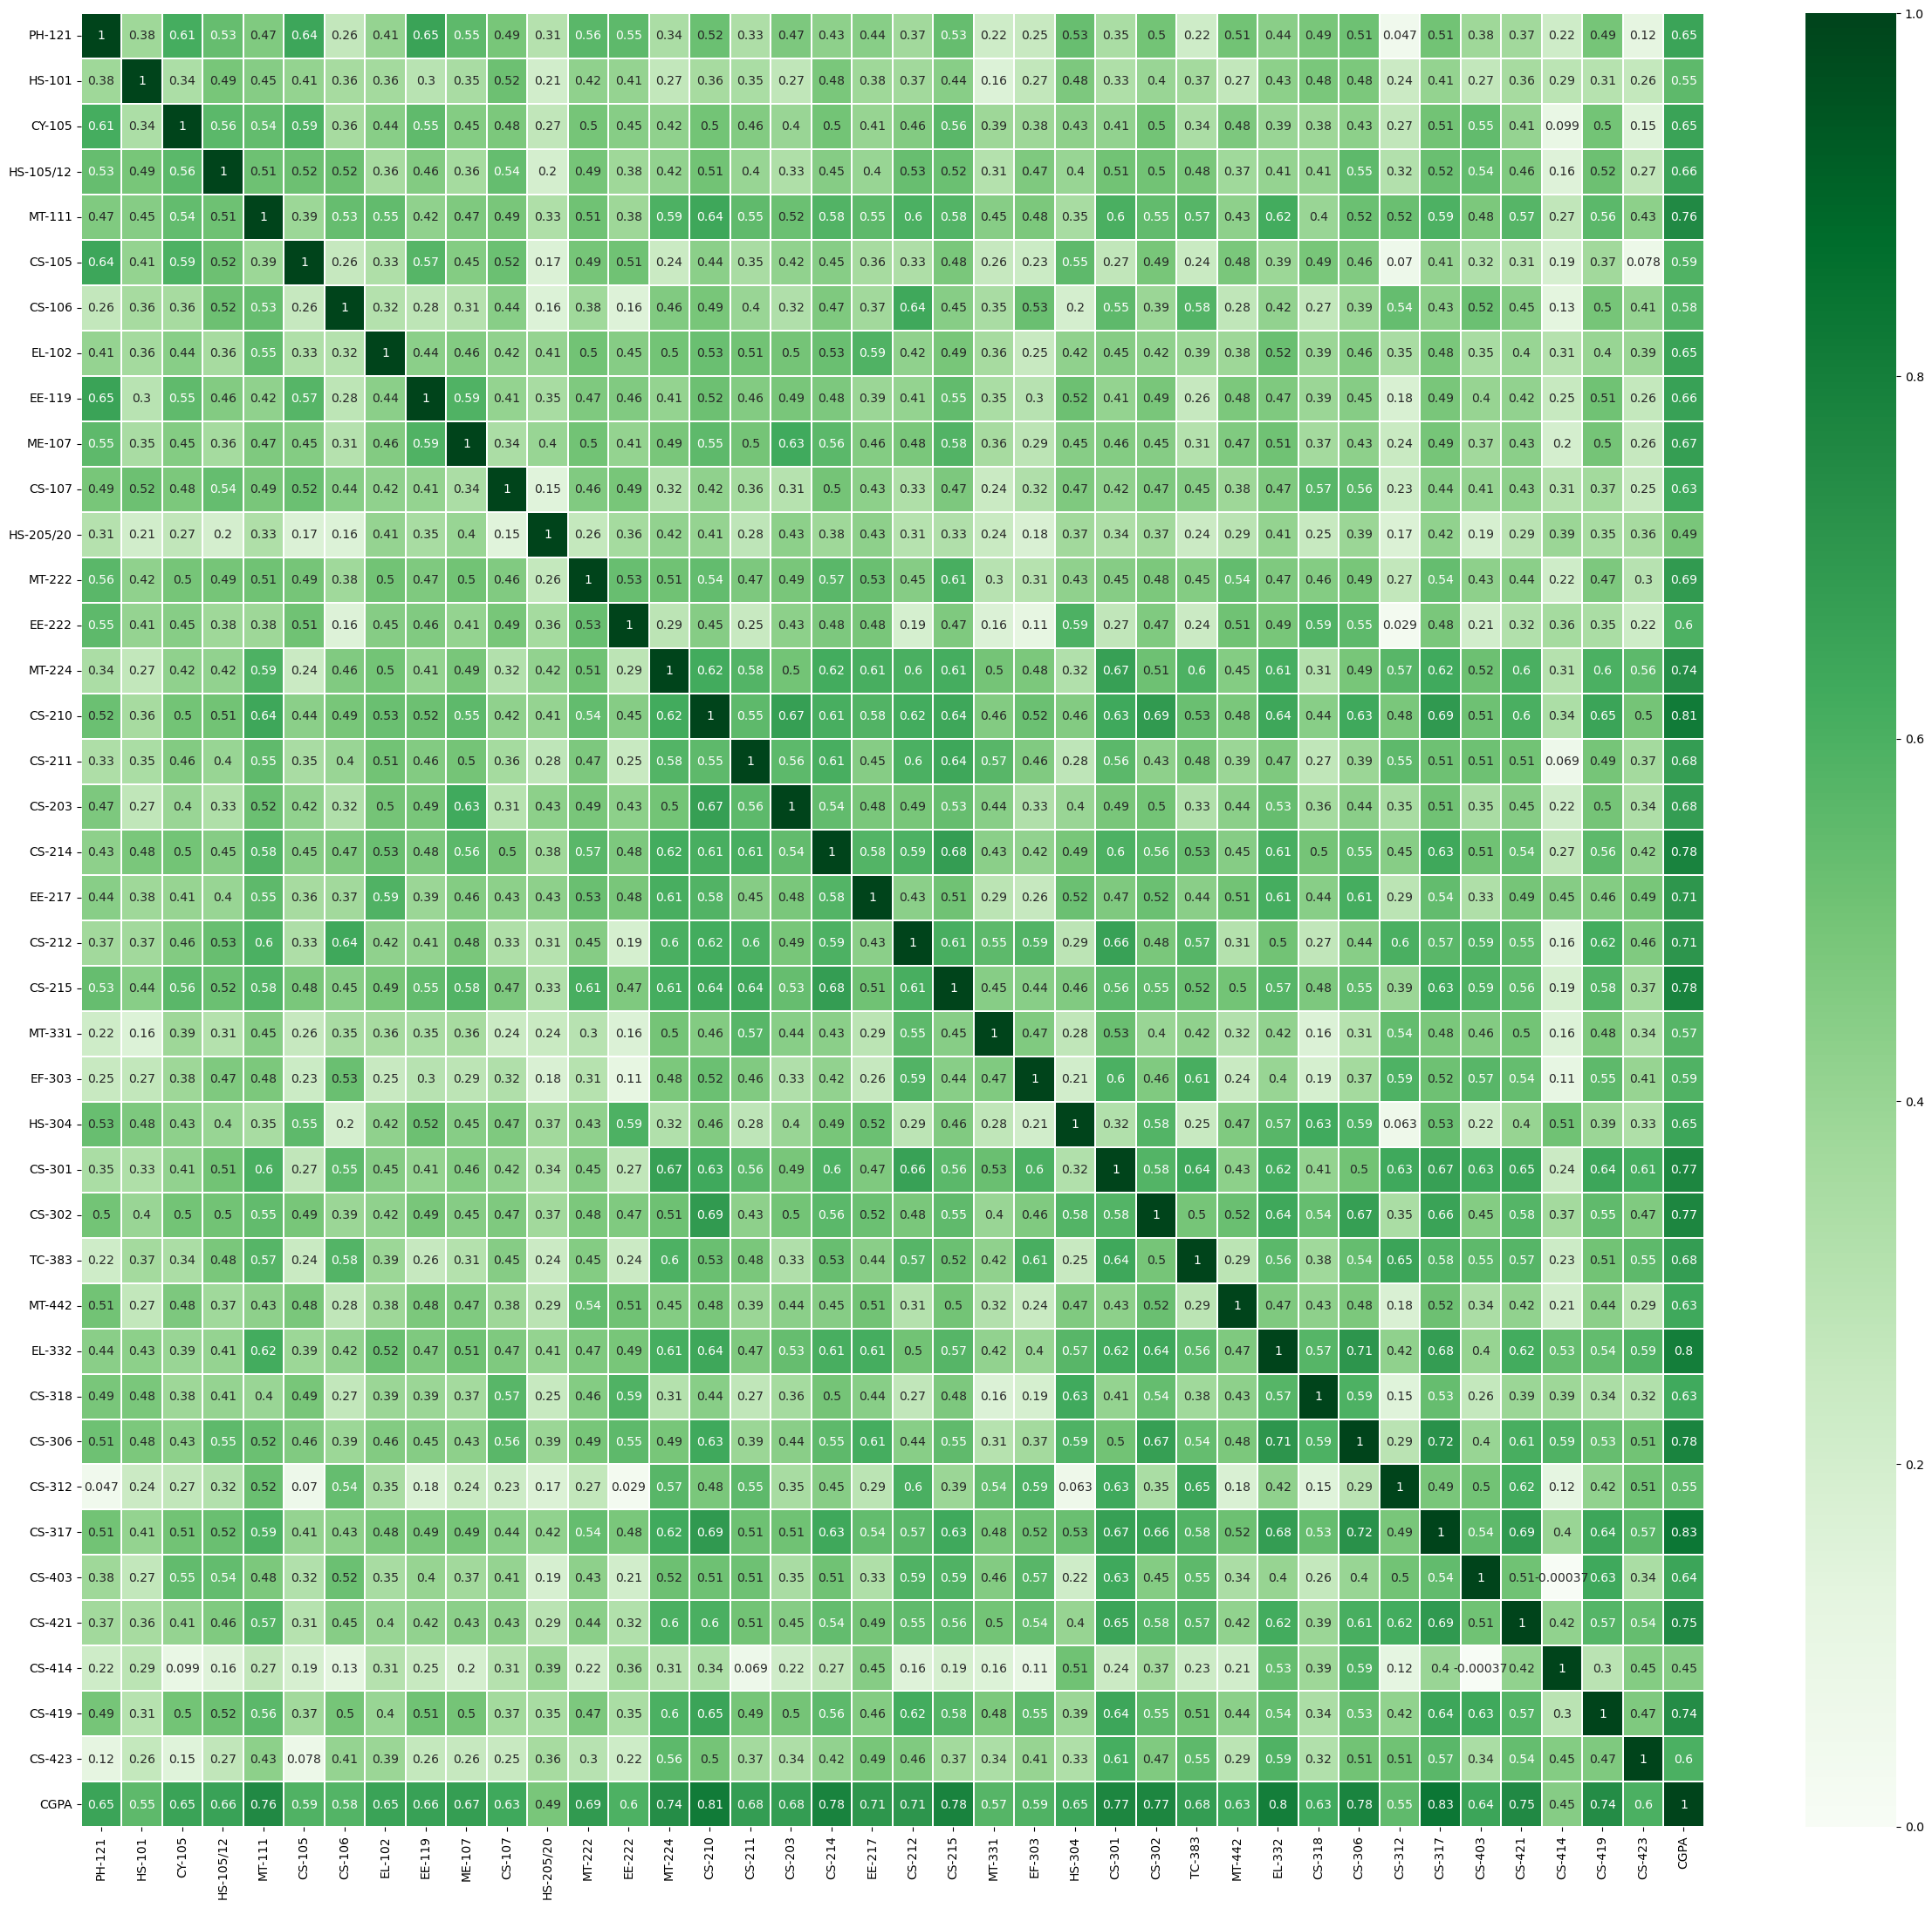

In [53]:
plt.figure(figsize=(30,27))
sns.heatmap(df.corr(),fmt='.2g',annot=True,linewidth=.2,cmap='Greens')
plt.show()

All the features are positively correlated. There are moderate to strong correlated can be observed in the dataset.

Separating target and independent features

In [54]:
x=df.drop('CGPA',axis=1)
y=df['CGPA']

# Feature scaling

In [55]:
def scaling_stdScaler(x):
    st=StandardScaler()
    x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
    return x

In [56]:
x=scaling_stdScaler(x)

Standard scaling will transfor the values of the dataset into same scale. It will help in improving the model performance and ensure that the data is in the same scale.

# Variance Inflation Factor

In [57]:
def vif_calc(x):
    vif=pd.DataFrame()
    vif['Features']=x.columns
    vif['VIF Factors']=[VIF(x.values,i) for i in range(x.shape[1])]
    
    return vif

In [58]:
vif=vif_calc(x)
vif

,Features,VIF Factors
0,PH-121,3.294078
1,HS-101,1.956234
2,CY-105,2.667115
3,HS-105/12,2.590040
4,MT-111,2.825000
5,CS-105,2.638288
6,CS-106,2.334263
7,EL-102,2.134241
8,EE-119,2.506934
9,ME-107,2.420249


The VIF in the dataset is within the acceptable range. Hence no need to remove any features.

# Modelling

Calculating best random state and score

In [59]:
def random_state_cal(x,y):
    best_randomstate = None
    best_score = 0
    
    for rs in range(1,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=rs)
        lr=LinearRegression()
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>best_score:
            best_score=score
            best_randomstate=rs
    print('R2 Score :{} Random state :{}'.format(best_score,best_randomstate))

In [60]:
random_state_cal(x,y)

R2 Score :0.99773422386752 Random state :31


Applying train_test_split with test_size=.30 and random_state=31

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=31)

Linear Regression Model

In [62]:
def linear_regression(x_train,x_test,y_train,y_test):
    
    model_lr=LinearRegression()
    model_lr.fit(x_train,y_train)
    prediction_lr=model_lr.predict(x_test)
    prediction_y_train=model_lr.predict(x_train)
    
    r2=r2_score(y_test,prediction_lr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_lr)
    mse=mean_squared_error(y_test,prediction_lr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_lr))
    prediction_chart=pd.DataFrame({'Linear Regression':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_lr 

In [63]:
prediction_chart,prediction_lr=linear_regression(x_train,x_test,y_train,y_test)
prediction_chart

,Linear Regression,Scores
0,R2 Score,99.773422
1,R2 Score on Training Data,99.567540
2,Mean Absolute Error,0.021209
3,Mean Squared Error,0.000844
4,Root Mean Squared Error,0.029060


Lasso Regression

In [64]:
def lasso(x_train,x_test,y_train,y_test):
    
    model_lasso=Lasso()
    model_lasso.fit(x_train,y_train)
    prediction_las=model_lasso.predict(x_test)
    prediction_y_train=model_lasso.predict(x_train)
    
    r2=r2_score(y_test,prediction_las) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_las)
    mse=mean_squared_error(y_test,prediction_las)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_las))
    prediction_chart=pd.DataFrame({'Lasso':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_las

In [65]:
prediction_chart,prediction_las=lasso(x_train,x_test,y_train,y_test)
prediction_chart

,Lasso,Scores
0,R2 Score,-0.012684
1,R2 Score on Training Data,0.000000
2,Mean Absolute Error,0.508995
3,Mean Squared Error,0.372751
4,Root Mean Squared Error,0.610533


Ridge Regression

In [66]:
def ridge(x_train,x_test,y_train,y_test):
    
    model_ridge=Ridge()
    model_ridge.fit(x_train,y_train)
    prediction_ridge=model_ridge.predict(x_test)
    prediction_y_train=model_ridge.predict(x_train)
    
    r2=r2_score(y_test,prediction_ridge) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_ridge)
    mse=mean_squared_error(y_test,prediction_ridge)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_ridge))
    prediction_chart=pd.DataFrame({'Ridge':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_ridge

In [67]:
prediction_chart,prediction_ridge=ridge(x_train,x_test,y_train,y_test)
prediction_chart

,Ridge,Scores
0,R2 Score,99.773899
1,R2 Score on Training Data,99.567531
2,Mean Absolute Error,0.021181
3,Mean Squared Error,0.000843
4,Root Mean Squared Error,0.029029


Random Forest

In [68]:
def random_forest(x_train,x_test,y_train,y_test):
    
    model_ran_forest=RandomForestRegressor()
    model_ran_forest.fit(x_train,y_train)
    prediction_rf=model_ran_forest.predict(x_test)
    prediction_y_train=model_ran_forest.predict(x_train)
    
    r2=r2_score(y_test,prediction_rf) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_rf)
    mse=mean_squared_error(y_test,prediction_rf)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_rf))
    prediction_chart=pd.DataFrame({'Random Forest':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_rf

In [69]:
prediction_chart, prediction_rf=random_forest(x_train,x_test,y_train,y_test)
prediction_chart

,Random Forest,Scores
0,R2 Score,95.519655
1,R2 Score on Training Data,99.322805
2,Mean Absolute Error,0.098616
3,Mean Squared Error,0.016698
4,Root Mean Squared Error,0.129222


KNN Regression

In [70]:
def knn(x_train,x_test,y_train,y_test):
    
    model_knn=KNN()
    model_knn.fit(x_train,y_train)
    prediction_knn=model_knn.predict(x_test)
    prediction_y_train=model_knn.predict(x_train)
    
    r2=r2_score(y_test,prediction_knn) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_knn)
    mse=mean_squared_error(y_test,prediction_knn)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_knn))
    prediction_chart=pd.DataFrame({'KNN':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_knn

In [71]:
prediction_chart,prediction_knn=knn(x_train,x_test,y_train,y_test)
prediction_chart

,KNN,Scores
0,R2 Score,96.762579
1,R2 Score on Training Data,97.482470
2,Mean Absolute Error,0.083107
3,Mean Squared Error,0.012066
4,Root Mean Squared Error,0.109845


SVR Regression

In [72]:
def svr(x_train,x_test,y_train,y_test):
    
    model_svr=SVR()
    model_svr.fit(x_train,y_train)
    prediction_svr=model_svr.predict(x_test)
    prediction_y_train=model_svr.predict(x_train)
    
    r2=r2_score(y_test,prediction_svr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_svr)
    mse=mean_squared_error(y_test,prediction_svr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_svr))
    prediction_chart=pd.DataFrame({'SVR':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_svr

In [73]:
prediction_chart, prediction_svr=svr(x_train,x_test,y_train,y_test)
prediction_chart

,SVR,Scores
0,R2 Score,97.299793
1,R2 Score on Training Data,98.751069
2,Mean Absolute Error,0.075888
3,Mean Squared Error,0.010064
4,Root Mean Squared Error,0.100318


Decision Tree Regressor

In [74]:
def decision_tree(x_train,x_test,y_train,y_test):
    
    model_dt=DTR()
    model_dt.fit(x_train,y_train)
    prediction_dt=model_dt.predict(x_test)
    prediction_y_train=model_dt.predict(x_train)
    
    r2=r2_score(y_test,prediction_dt) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_dt)
    mse=mean_squared_error(y_test,prediction_dt)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_dt))
    prediction_chart=pd.DataFrame({'Decision Tree':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_dt

In [75]:
prediction_chart, prediction_dt=decision_tree(x_train,x_test,y_train,y_test)
prediction_chart

,Decision Tree,Scores
0,R2 Score,85.000363
1,R2 Score on Training Data,100.000000
2,Mean Absolute Error,0.179125
3,Mean Squared Error,0.055904
4,Root Mean Squared Error,0.236441


Gradient Boosting Regressor

In [76]:
def gradient_boosting(x_train,x_test,y_train,y_test):
    
    model_gbr=GradientBoostingRegressor()
    model_gbr.fit(x_train,y_train)
    prediction_gb=model_gbr.predict(x_test)
    prediction_y_train=model_gbr.predict(x_train)
    
    r2=r2_score(y_test,prediction_gb) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_gb)
    mse=mean_squared_error(y_test,prediction_gb)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_gb))
    prediction_chart=pd.DataFrame({'Gradient Boosting Regressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_gb

In [77]:
prediction_chart, prediction_gb=gradient_boosting(x_train,x_test,y_train,y_test)
prediction_chart

,Gradient Boosting Regressor,Scores
0,R2 Score,96.691159
1,R2 Score on Training Data,99.752987
2,Mean Absolute Error,0.084231
3,Mean Squared Error,0.012332
4,Root Mean Squared Error,0.111050


ExtraTrees Regression

In [78]:
def extra_trees_regressor(x_train,x_test,y_train,y_test):
    
    model_etr=ExtraTreesRegressor()
    model_etr.fit(x_train,y_train)
    prediction_etr=model_etr.predict(x_test)
    prediction_y_train=model_etr.predict(x_train)
    
    r2=r2_score(y_test,prediction_etr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_etr)
    mse=mean_squared_error(y_test,prediction_etr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_etr))
    prediction_chart=pd.DataFrame({'Extra Trees Regressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_etr

In [79]:
prediction_chart, prediction_etr=extra_trees_regressor(x_train,x_test,y_train,y_test)
prediction_chart

,Extra Trees Regressor,Scores
0,R2 Score,96.780466
1,R2 Score on Training Data,100.000000
2,Mean Absolute Error,0.083385
3,Mean Squared Error,0.011999
4,Root Mean Squared Error,0.109541


Cross validating the models

In [80]:
def cross_validation(x,y,*args):
    
    # Cross validation for LinearRegression
    cv_score_lr= cross_val_score(LinearRegression(),x,y,cv=5, scoring='r2')
    cv_r2_score_lr=cv_score_lr.mean()
    r2_lr=r2_score(y_test,prediction_lr)
    score_diff_lr=(r2_lr-cv_r2_score_lr)
    
    # Cross validation for Lasso
    cv_score_las= cross_val_score(Lasso(),x,y,cv=5, scoring='r2')
    cv_r2_score_las=cv_score_las.mean()
    r2_las=r2_score(y_test,prediction_las)
    score_diff_las=(r2_las-cv_r2_score_las)
    
    # Cross validation for Ridge
    cv_score_ridge= cross_val_score(Ridge(),x,y,cv=5, scoring='r2')
    cv_r2_score_ridge=cv_score_ridge.mean()
    r2_ridge=r2_score(y_test,prediction_ridge)
    score_diff_ridge=(r2_ridge-cv_r2_score_ridge)
    
    # Cross validation for Random Forest
    cv_score_rf= cross_val_score(RandomForestRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_rf=cv_score_rf.mean()
    r2_rf=r2_score(y_test,prediction_rf)
    score_diff_rf=(r2_rf-cv_r2_score_rf)
    
    # Cross validation for KNN
    cv_score_knn= cross_val_score(KNN(),x,y,cv=5, scoring='r2')
    cv_r2_score_knn=cv_score_knn.mean()
    r2_knn=r2_score(y_test,prediction_knn)
    score_diff_knn=(r2_knn-cv_r2_score_knn)
    
    # Cross validation for SVR
    cv_score_svr= cross_val_score(SVR(),x,y,cv=5, scoring='r2')
    cv_r2_score_svr=cv_score_svr.mean()
    r2_svr=r2_score(y_test,prediction_svr)
    score_diff_svr=(r2_svr-cv_r2_score_svr)
    
    # Cross validation for Decision Tree
    cv_score_dt= cross_val_score(DTR(),x,y,cv=5, scoring='r2')
    cv_r2_score_dt=cv_score_dt.mean()
    r2_dt=r2_score(y_test,prediction_dt)
    score_diff_dt=(r2_dt-cv_r2_score_dt)
    
    # Cross validation for GradientBoost
    cv_score_gb= cross_val_score(GradientBoostingRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_gb=cv_score_gb.mean()
    r2_gb=r2_score(y_test,prediction_gb)
    score_diff_gb=(r2_gb-cv_r2_score_gb)
    
    # Cross validation for ExtraTreesRegressor
    cv_score_etr= cross_val_score(ExtraTreesRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_etr=cv_score_etr.mean()
    r2_etr=r2_score(y_test,prediction_etr)
    score_diff_etr=(r2_etr-cv_r2_score_etr)
    
    df=pd.DataFrame({'Regression Name':['LinearRegression',
                                        'Lasso',
                                        'Ridge',
                                        'Random Forest',
                                        'KNN',
                                        'SVR',
                                        'Decision Tree',
                                        'GradientBoost',
                                        'ExtraTreesRegressor'],
                     'Regression Score':[r2_lr,r2_las,r2_ridge,r2_rf,r2_knn,r2_svr,r2_dt,r2_gb,r2_etr],
                     'Cross Val Score':[cv_r2_score_lr,cv_r2_score_las,cv_r2_score_ridge, cv_r2_score_rf,cv_r2_score_knn,
                                        cv_r2_score_svr,cv_r2_score_dt,cv_r2_score_gb,cv_r2_score_etr],
                     'Difference': [score_diff_lr,score_diff_las,score_diff_ridge,score_diff_rf,score_diff_knn,score_diff_svr,
                                    score_diff_dt,score_diff_gb,score_diff_etr]
                    })
    return df

In [81]:
# Creating the list of model prediction variables

pred=[prediction_lr, prediction_las, prediction_ridge, prediction_rf, prediction_knn,prediction_svr,prediction_dt, prediction_gb, prediction_etr]

In [82]:
cross_validation(x,y,y_test, *pred)

,Regression Name,Regression Score,Cross Val Score,Difference
0,LinearRegression,0.997734,0.994863,0.002871
1,Lasso,-0.000127,-0.009516,0.009389
2,Ridge,0.997739,0.994871,0.002868
3,Random Forest,0.955197,0.952294,0.002903
4,KNN,0.967626,0.962027,0.005599
5,SVR,0.972998,0.969603,0.003395
6,Decision Tree,0.850004,0.814148,0.035856
7,GradientBoost,0.966912,0.966665,0.000247
8,ExtraTreesRegressor,0.967805,0.960444,0.007360


Both Linear Regression model and Ridge regression model are performing well. Both the models also have almost similar level of performance. 

However, since Ridge regression is the regularization method used in linear regression. Hence, Ridge regression is the best model for the dataset.

# GridSearchCV Hyperparameter Tuning

Creating dictionary of parameters variable for Ridge regression model

In [83]:
parameters={'alpha':[0.01,0.1,0.2,0.5,1,2],
            'fit_intercept':[True,False],
            'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
            'random_state':[31,33,37,42,45,47],
            'tol': [1e-4, 1e-3, 1e-2, 1e-1],
            'max_iter': [None, 100, 500, 1000]
           }

Applying GridSearchCV on the Ridge Regression model

In [84]:
gridsearch_cv=GridSearchCV(Ridge(),parameters,cv=5)
gridsearch_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.5, 1, 2],
                         'fit_intercept': [True, False],
                         'max_iter': [None, 100, 500, 1000],
                         'random_state': [31, 33, 37, 42, 45, 47],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.0001, 0.001, 0.01, 0.1]})

In [85]:
# Checking the best parameters

gridsearch_cv.best_params_

{'alpha': 0.01,
 'fit_intercept': True,
 'max_iter': None,
 'random_state': 31,
 'solver': 'sparse_cg',
 'tol': 0.01}

 # Creating the final model

In [86]:
final_model=Ridge(alpha=0.01,fit_intercept=True,max_iter=None,random_state=31,solver='sparse_cg',tol=0.01)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
r2=r2_score(y_test,pred)
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
rmse=np.sqrt(mean_absolute_error(y_test,pred))

prediction_chart=pd.DataFrame({'Final model (Ridge)':['R2 Score',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,mae,mse,rmse]
                                  })
prediction_chart

,Final model (Ridge),Scores
0,R2 Score,0.997412
1,Mean Absolute Error,0.022057
2,Mean Squared Error,0.000965
3,Root Mean Squared Error,0.148517


# Saving the model

Using Joblib

In [87]:
import joblib

In [88]:
joblib.dump(final_model,'Student_grade_prediction.pkl')

['Student_grade_prediction.pkl']

Using Pickle

In [89]:
import pickle

In [90]:
file='Student_grade_prediction.pkl'
pickle.dump(final_model,open(file,'wb'))

Loading the file

In [91]:
test_model=pickle.load(open('Student_grade_prediction.pkl','rb'))
predict=test_model.score(x_test,y_test)
print(predict)

0.9974121359127779


In [92]:
pd.DataFrame([test_model.predict(x_test)[:],y_test[:]],index=['Predict','Original'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167
Predict,3.906977,2.329818,3.083016,2.786576,3.66674,3.784185,3.76795,2.036038,3.623923,2.091788,3.22425,1.870987,1.890399,3.942709,2.918371,2.620701,2.552632,3.931725,3.26605,3.701339,2.750212,2.648681,3.160895,1.999593,2.90947,3.652557,2.691882,3.511505,3.577716,3.165874,2.000457,3.847882,2.874762,1.923374,3.650685,3.057278,3.328856,3.824596,3.41757,3.212553,3.232925,1.89773,3.213825,2.576021,3.560655,3.487631,3.07076,1.886162,3.792072,3.484027,3.766526,3.050651,2.675741,3.32528,3.449887,2.273013,2.886834,3.059236,3.037217,2.785497,3.300176,2.111847,2.699489,2.377923,2.065605,3.673812,2.591555,2.424398,2.072259,2.922485,3.464392,3.488203,3.05265,2.313243,2.275815,3.469478,3.649111,2.929121,3.8971,3.337979,2.775101,2.184491,3.911499,2.564512,3.483559,3.243456,2.039747,2.937184,1.823239,1.778216,3.40456,2.188119,3.72257,2.368178,3.018919,2.297272,3.690096,3.456672,3.741096,3.02672,3.586155,2.650507,3.050483,3.684882,3.426766,2.975313,2.820952,2.390809,2.974599,3.00175,1.866779,3.447563,3.084844,2.058813,1.815163,3.326199,3.063314,2.35151,3.730032,3.58452,1.585884,3.201639,3.368358,2.75812,2.899644,3.629696,2.991827,3.650134,3.354605,2.007824,2.038583,2.859343,2.770346,2.83564,3.03125,2.83648,3.504657,3.275887,2.793752,3.610553,3.931796,2.815416,3.381651,1.797187,3.684983,2.6447,2.402361,3.11152,3.626588,3.92989,3.732888,2.201746,3.771308,2.763075,3.503995,3.342009,1.959498,3.150507,2.563444,3.778656,3.657236,3.013761,3.009222,3.057698,2.853954,2.933058,2.588441,2.05604
Original,3.925000,2.350000,3.137000,2.779000,3.62300,3.769000,3.75400,2.035000,3.648000,2.040000,3.21700,1.826000,1.923000,3.946000,2.805000,2.644000,2.602000,3.942000,3.24500,3.707000,2.756000,2.621000,3.112000,1.993000,2.95600,3.651000,2.654000,3.479000,3.576000,3.164000,1.936000,3.844000,2.925000,1.905000,3.645000,3.056000,3.335000,3.843000,3.40400,3.241000,3.208000,1.99600,3.211000,2.579000,3.521000,3.477000,3.10300,1.886000,3.818000,3.448000,3.758000,3.033000,2.698000,3.33200,3.432000,2.246000,2.854000,3.063000,3.043000,2.756000,3.318000,2.129000,2.763000,2.391000,2.028000,3.672000,2.595000,2.424000,2.042000,2.938000,3.476000,3.491000,3.05800,2.352000,2.298000,3.443000,3.700000,2.918000,3.8970,3.339000,2.784000,2.171000,3.906000,2.564000,3.504000,3.252000,2.069000,2.947000,1.764000,1.804000,3.40000,2.206000,3.72500,2.352000,2.999000,2.300000,3.711000,3.458000,3.736000,3.02300,3.583000,2.659000,3.023000,3.694000,3.387000,3.058000,2.711000,2.347000,2.948000,3.01900,1.890000,3.443000,3.114000,2.034000,1.747000,3.350000,3.043000,2.37800,3.705000,3.57400,1.708000,3.240000,3.386000,2.76800,2.895000,3.668000,3.019000,3.659000,3.418000,2.009000,2.053000,2.828000,2.779000,2.88000,3.02900,2.85100,3.528000,3.267000,2.821000,3.597000,3.943000,2.806000,3.437000,1.805000,3.696000,2.6050,2.359000,3.11100,3.662000,3.94200,3.723000,2.191000,3.772000,2.785000,3.523000,3.365000,1.951000,3.160000,2.555000,3.798000,3.651000,3.030000,3.019000,3.060000,2.857000,2.931000,2.611000,1.98900
